## House Price Predictions in Ames, Iowa - Introduction

In this project I will be analyzing house prices for the town of Ames, Iowa using a dataset provided for a Kaggle competition. This dataset contains 1,460 observations and 80 features which capture many aspects that can help predict the market value of a house.

The objective of this analysis is to generate value to a company by providing house price predictions that can be used in a return on investment analysis.

## Importing Libraries 

In [293]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
import seaborn as sns

## Exploratory Data Analysis

In [294]:
full = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [295]:
full.shape

(1460, 81)

In [296]:
pd.options.display.max_columns = None

In [297]:
full.head(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

List of categorical variables:

- MSSubClass, MSZoning, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, Foundation, Heating, CentralAir, Electrical, PavedDrive, MiscFeature, SaleType, SaleCondition

List of numerical variables:

- LotFrontage, LotArea, YearBuilt, YearRemodAdd, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, GarageYrBlt, GarageCars, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold

List of ordinal variables:

- OverallQual, OverallCond, ExterQual, ExterCond, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, HeatingQC, KitchenQual, Functional, Fireplaces, Fireplaces, GarageType, GarageFinish, GarageQual, GarageCond, PoolQC, Fence

### Exploring Target Variable - Sale Price

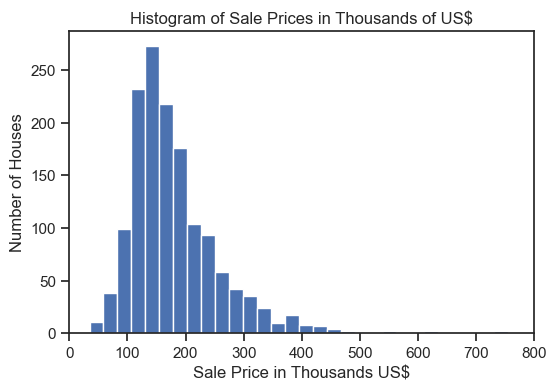

In [298]:
f, ax = plt.subplots()
plt.hist(full.SalePrice, bins = 30)
ax.set(ylabel="Number of Houses",
       xlabel="Sale Price in Thousands US$",
      title="Histogram of Sale Prices in Thousands of US$")
plt.xticks(ax.get_xticks(), (ax.get_xticks() / 1000).astype(int))
plt.xlim(0)
plt.savefig('./images/hist_saleprice.png', dpi=500)
plt.show()

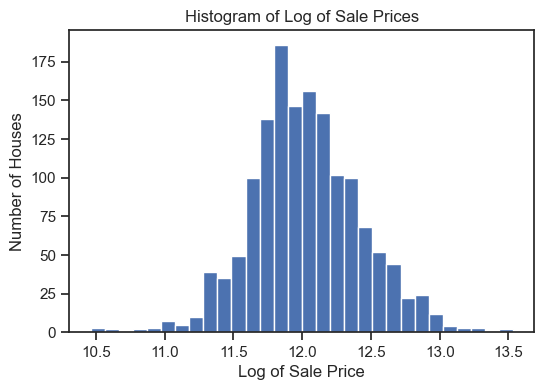

In [299]:
f, ax = plt.subplots()
plt.hist(np.log(full.SalePrice), bins = 30)
ax.set(ylabel="Number of Houses",
       xlabel="Log of Sale Price",
      title="Histogram of Log of Sale Prices")
plt.savefig('./images/hist_logsaleprice.png', dpi=500)

### Exploring Living Area

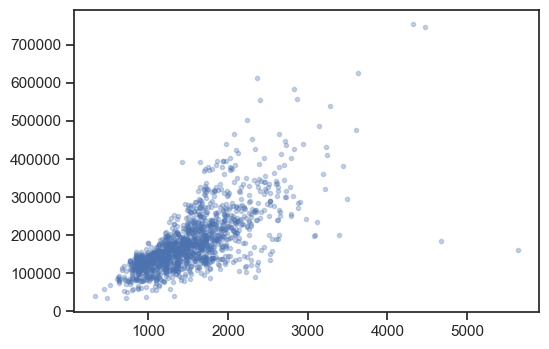

In [300]:
plt.plot(full.GrLivArea, full.SalePrice,
         '.', alpha = 0.3)
plt.savefig('./images/plot_livarea_saleprice.png', dpi=500)

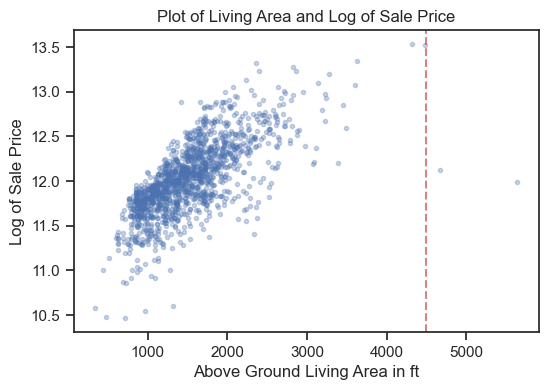

In [301]:
f, ax = plt.subplots()
plt.plot(full.GrLivArea, np.log(full.SalePrice),'.', alpha = 0.3)
ax.set(ylabel="Log of Sale Price",
       xlabel="Above Ground Living Area in ft",
      title="Plot of Living Area and Log of Sale Price")
plt.axvline(4500, linestyle='--', color='r', label='optimal lambda', alpha=0.7)
plt.savefig('./images/plot_livarea_logsaleprice.png', dpi=500)

Adding log of SalePrice to use as target in order to create a more normal distribution which helps deal with extreme values and can help some regression models have better prediction.

We also see some outliers that have very large living area but comparably low sale prices. According to the statistics professor who originally supplied the housing data, the outliers are “Partial Sales that likely don't represent actual market values” so we will exclude them.

In [302]:
full['LogSalePrice'] = np.log(full.SalePrice)
full = full[full.GrLivArea < 4500]

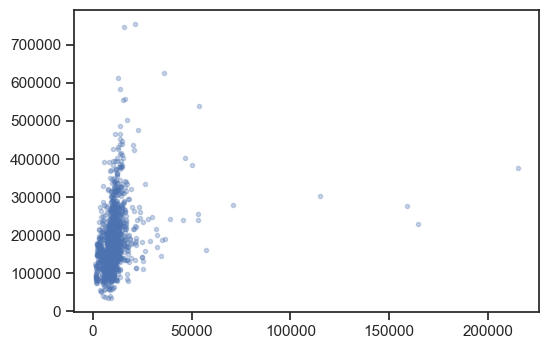

In [303]:
plt.plot(full.LotArea, full.SalePrice,
         '.', alpha = 0.3)

### Exploring Overall Quality and Overall Condition

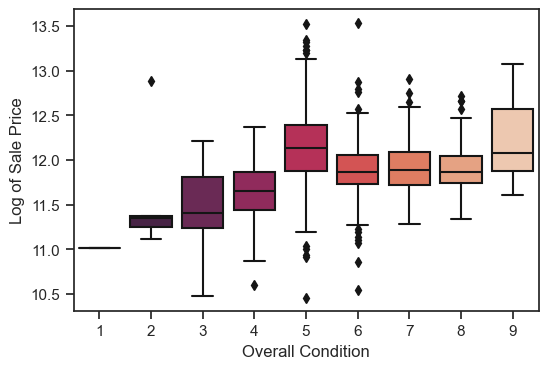

In [304]:
sns.set(rc={'figure.dpi':100})
sns.set_theme(style="ticks")
# Draw a nested violinplot and split the violins for easier comparison
ax = sns.boxplot(data=full, x="OverallCond", y="LogSalePrice",palette="rocket")
ax.set(ylabel="Log of Sale Price",
       xlabel="Overall Condition")
ax.figure.savefig('./images/boxplot_condition.png', dpi=500)

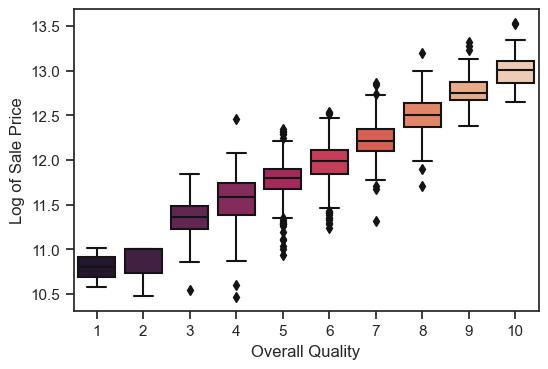

In [305]:
sns.set(rc={'figure.dpi':100})
sns.set_theme(style="ticks")
# Draw a nested violinplot and split the violins for easier comparison
ax = sns.boxplot(data=full, x="OverallQual", y="LogSalePrice",palette="rocket")
ax.set(ylabel="Log of Sale Price",
       xlabel="Overall Quality")
ax.figure.savefig('./images/boxplot_quality.png', dpi=500)

### Exploring Zoning Classification

In [306]:
round(full.MSZoning.value_counts()/full.MSZoning.count()*100,1)

RL         78.8
RM         15.0
FV          4.5
RH          1.1
C (all)     0.7
Name: MSZoning, dtype: float64

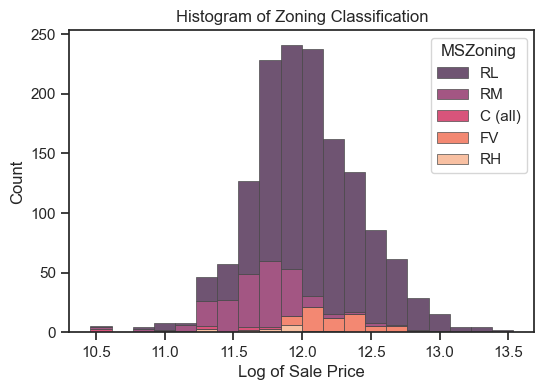

In [307]:
sns.set_theme(style="ticks")
ax = sns.histplot(
    full,
    x="LogSalePrice",
    hue="MSZoning",
    multiple="stack",
    bins=20,
    palette="rocket",
    edgecolor=".3",
    legend = True,
    linewidth=.5)
ax.set(ylabel="Count",
       xlabel="Log of Sale Price",
      title="Histogram of Zoning Classification")
ax.figure.savefig('./images/hist_zoning.png', dpi=500)

### Exploring Bedrooms and Bathrooms

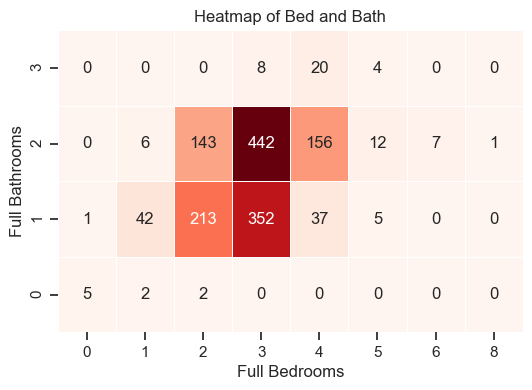

In [308]:
rooms = full.groupby(['FullBath','BedroomAbvGr']).size(
).unstack(fill_value=0).iloc[::-1]
ax = sns.heatmap(rooms, annot=True, fmt="d", linewidths=.5,cbar=None, cmap="Reds")
ax.set(ylabel="Full Bathrooms",
       xlabel="Full Bedrooms",
      title="Heatmap of Bed and Bath")
ax.figure.savefig('./images/bed_bath_heatmap.png', dpi=500)

### Exploring Neighborhoods

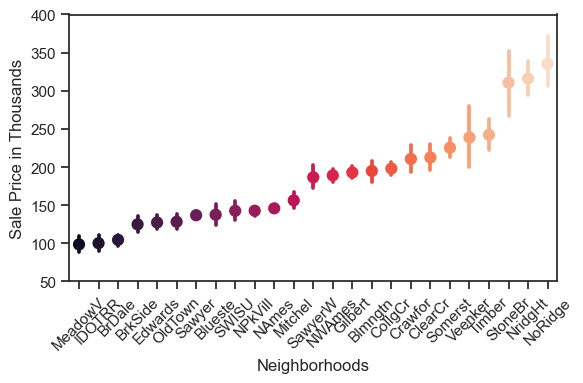

In [309]:
neight_sp_mean = full.groupby('Neighborhood')['SalePrice'].mean().sort_values()
ax = sns.pointplot(x = full.Neighborhood.values, y = full.SalePrice.values, order = neight_sp_mean.index, palette='rocket')
plt.yticks(ax.get_yticks(), (ax.get_yticks() / 1000).astype(int))
plt.ylabel('Sale Price in Thousands')
plt.xlabel('Neighborhoods')
plt.xticks(rotation=45)
plt.tight_layout()
ax.figure.savefig('./images/neighbourhoods.png', dpi=500)

## Missing Data and Imputation

Dropping the ID column which does not provide any value

In [310]:
full.drop(['Id'], axis=1, inplace=True)
test.drop(['Id'], axis=1, inplace=True)

Checking which columns have missing values and ordering them by amount

In [311]:
null_cols = full.columns[full.isnull().any()]
full_null = full[null_cols].isnull().sum().sort_values(ascending=False)
print('List of Missing Values:')
print(full_null)

List of Missing Values:
PoolQC          1452
MiscFeature     1404
Alley           1367
Fence           1177
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64


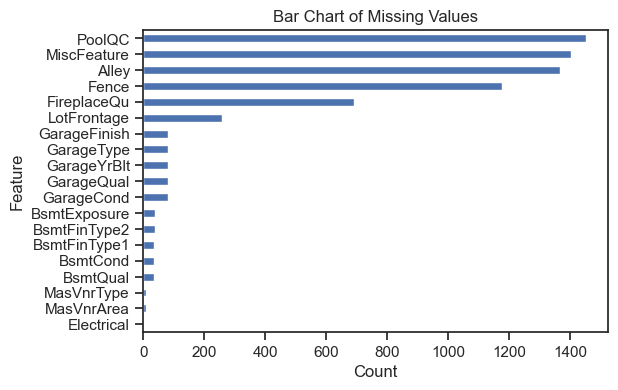

In [312]:
# sns.set_theme(style="ticks")
full_null = full_null.sort_values(ascending=True)
ax = full_null.plot(kind='barh')
ax.set(ylabel="Feature",
       xlabel="Count",
      title="Bar Chart of Missing Values")
ax.figure.savefig('./images/missing_values_barchart.png', dpi=500, bbox_inches = 'tight')

In [313]:
# Testing to see if there is any missing pool quality score when the pool area is larger then 0 (where there is a pool)
full[(full['PoolQC'].isna()) & (full['PoolArea'] > 0)]

Empty DataFrame
Columns: [MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice, LogSalePrice]
Index: []

By looking at the data description file we can infer that most of the missing values are because the characteristic does not apply. For example, there is no pool quality score because there is no pool, as seen in the above code. In this case it will make sense to assign categorical values to a new category called 'None' and numerical values to '0'. This will more accurately represent this characteristic.

In [314]:
cat_feats_fillNone = ['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','GarageType','GarageFinish',
                     'GarageQual', 'GarageCond','BsmtExposure','BsmtFinType2','BsmtFinType1','BsmtCond','BsmtQual',
                     'MasVnrType','Electrical']
 
full[cat_feats_fillNone] = full[cat_feats_fillNone].fillna('None')

num_feats_fillzero = ['MasVnrArea', 'GarageYrBlt']

full[num_feats_fillzero] = full[num_feats_fillzero].fillna(0)

We still have one feature which has missing values, lot frontage, it would not make sense for it to be missing because all lots must have some area that is adjacent to the street. In this case there is no ideal solution, one option is to delete the columns but we would lose the information in it. Since the missing values are only 17.7% of all values we opted not to do that. The other two options are to impute them or to leave them. Leaving them would not allow some models to work so we will choose to impute them with the median value for that category.

In [315]:
full['LotFrontage'] = full['LotFrontage'].fillna(full['LotFrontage'].median())

In [316]:
null_cols = full.columns[full.isnull().any()]
full_null = full[null_cols].isnull().sum().sort_values(ascending=False)
print(full_null)

Series([], dtype: float64)


## Feature Engineering

Using domain knowledge and exploratory data analysis I have come up with some ideas of new variables to create in order to potentially enhance the predictive power of our models. This part is as much art as it is science and the possibilities are endless but we will have to make our best effort.

In [317]:
#A measure that takes into account both year built and remodeled
full['YrBltAndRemod']= full['YearBuilt'] + full['YearRemodAdd']

#A measure of total SF
full['TotalSF']= full['TotalBsmtSF'] + full['1stFlrSF'] + full['2ndFlrSF']

#A different measure of total SF
full['TotalSF2'] = full['BsmtFinSF1'] + full['BsmtFinSF2'] + full['1stFlrSF'] + full['2ndFlrSF']

#Variable with value of all bathrooms
full['Total_Bathrooms'] = (full['FullBath'] + (0.5 * full['HalfBath']) +
                           full['BsmtFullBath'] + (0.5 * full['BsmtHalfBath']))

#Variable with total porch square foot area
full['Total_porchSF'] = (full['OpenPorchSF'] + full['3SsnPorch'] + full['EnclosedPorch'] +
                         full['ScreenPorch'] +full['WoodDeckSF'])

#Binary variable for presence of certain house features
full['haspool'] = full['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
full['has2ndfloor'] = full['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
full['hasgarage'] = full['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
full['hasbsmt'] = full['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
full['hasfireplace'] = full['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

#Product of related quality scores
full['OverallRaiting'] = full['OverallQual']*full['OverallCond']

In [318]:
full.shape

(1458, 92)

## Dummifying

The process of dummifying will help our linear model perform correctly, although it is not strictly necessary for our tree based models. We will dummify before doing the train/test split because we don't find a risk of slippage since making dummies is not data dependent, it is just an application of a fixed transformation.

For our linear models I will try two versions: a dummified version where most ordinal categories, those that rank quality for example, will be preserved and another where all categorical variables are dummified with one hot encoding. 

In [319]:
from sklearn.preprocessing import LabelEncoder

#Doing label encoding to test on our tree models to see if we get better performance than one hot encoding method
full_le = full.copy()
columns_object = list(full_le.select_dtypes(include=['object']).columns)

for column in columns_object:
    full_le[column] = LabelEncoder().fit_transform(full_le[column])

In [320]:
#Dummifying categorical variables

full_d = pd.get_dummies(full,drop_first=True)

In [321]:
#Changing text ranking ordinal features to integer before doing one hot encoding. Also fixing one categorical variable
#that appears as numerical.
full_d2 = full.copy()

quality_scale = {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, 'None' : 0}
basement_scale = {'GLQ' : 6, 'ALQ' : 5, 'BLQ' : 4, 'Rec' : 3, 'LwQ' : 2, 'Unf' : 1, 'None' : 0}

full_d2 = full.replace({
    'MSSubClass' : {20 : 'MS20', 30 : 'MS30', 40 : 'MS40', 45 : 'MS45', 50 : 'MS50', 60 : 'MS60', 70 : 'MS70',
                   75 : 'MS75', 80 : 'MS80', 85 : 'MS85', 90 : 'MS90', 120 : 'MS120', 150 : 'MS150', 160 : 'MS160',
                   180 : 'MS180', 190 : 'MS190'},
    'ExterCond' : quality_scale,
    'BsmtQual' : quality_scale,
    'BsmtCond' : quality_scale,
    'BsmtExposure' : {'Gd' : 4, 'Av' : 3, 'Mn' : 2, 'No' : 1, 'NA' : 0},
    'BsmtFinType1' : basement_scale,
    'BsmtFinType2' : basement_scale,
    'HeatingQC' : quality_scale,
    'KitchenQual' : quality_scale,
    'FireplaceQu' : quality_scale,
    'GarageQual' : quality_scale,
    'GarageCond' : quality_scale,
    'PavedDrive' : {'Y' : 2, 'P' : 1, 'N' : 0},
    'PoolQC' : quality_scale,
})

#Converting the binary feature

full_d2['CentralAir'] = (full_d2['CentralAir'] == 'Y').astype(int)

full_d2 = pd.get_dummies(full_d2,drop_first=True)

## Train / Test Split

We will generate a train/test split for our two types of dummified dataframes

In [322]:
#Creating target variable and dropping it from full dataframe
y_le = full_le['LogSalePrice']
full_le.drop(['SalePrice', 'LogSalePrice'], inplace=True, axis=1)

y_d = full_d['LogSalePrice']
full_d.drop(['SalePrice', 'LogSalePrice'], inplace=True, axis=1)

y_d2 = full_d2['LogSalePrice']
full_d2.drop(['SalePrice', 'LogSalePrice'], inplace=True, axis=1)

In [323]:
from sklearn.model_selection import train_test_split
X_le_train, X_le_test, y_le_train, y_le_test = train_test_split(full_le, y_le, test_size=0.2, random_state=11)
X_d_train, X_d_test, y_d_train, y_d_test = train_test_split(full_d, y_d, test_size=0.2, random_state=11)
X_d2_train, X_d2_test, y_d2_train, y_d2_test = train_test_split(full_d2, y_d, test_size=0.2, random_state=11)

## Transforming Skewed Variables

In order to prevent violating some key assumptions (linearity, normality, and constant variance) we will do a transformation using the Yeo Johnson method to make the data more Gaussian-like. Although this does not guarantee a complete fix for those violations it will likely improve them, another benefit is that it can help strengthen the linear relationship and thus its prediction capabilities. However, I must note that this could lead to more overfitting and losing interpretability.

### Dummy 1

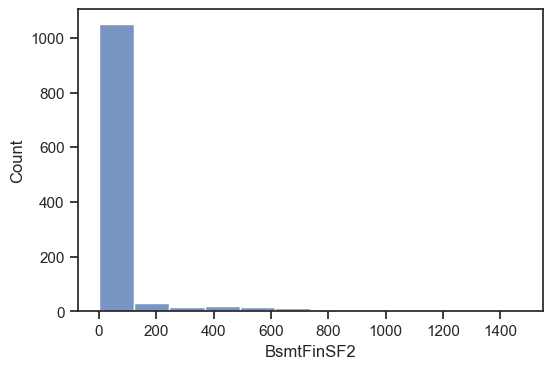

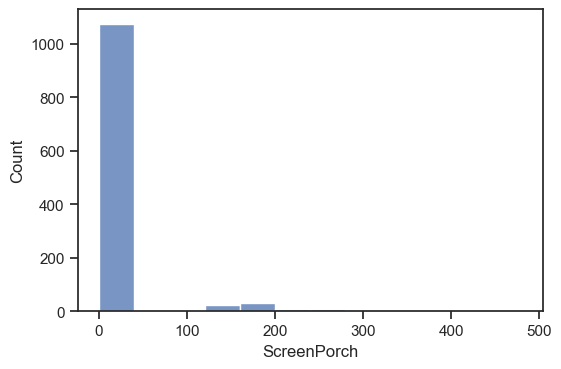

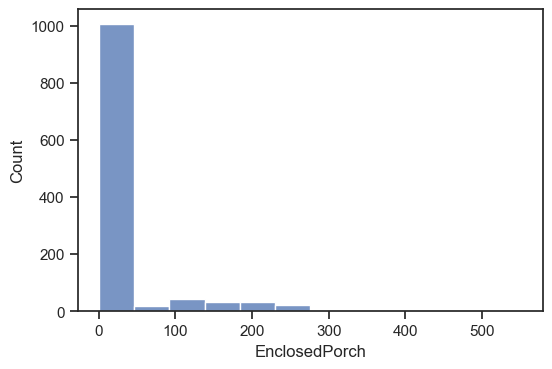

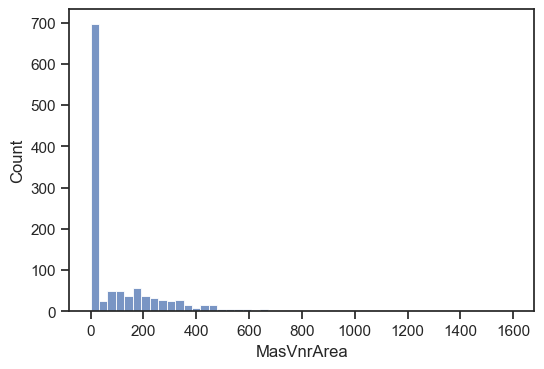

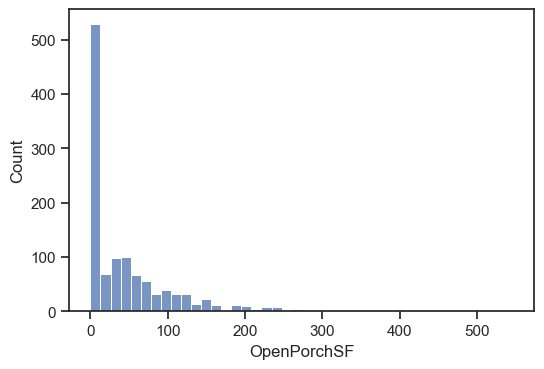

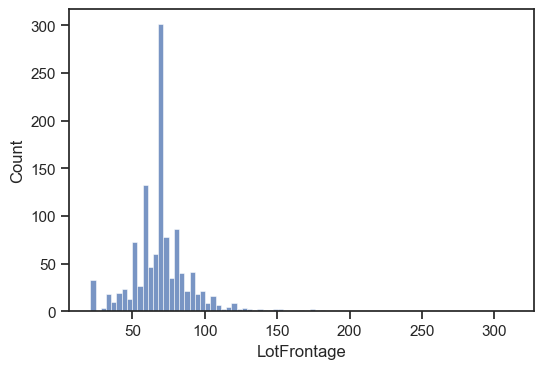

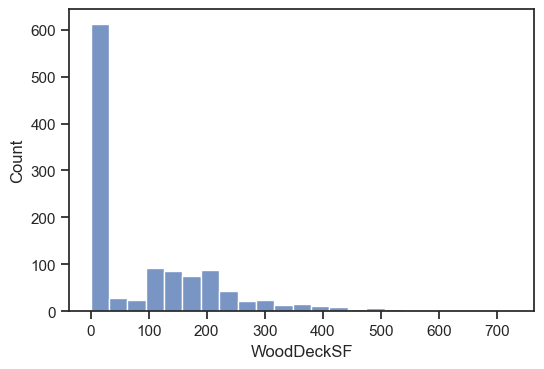

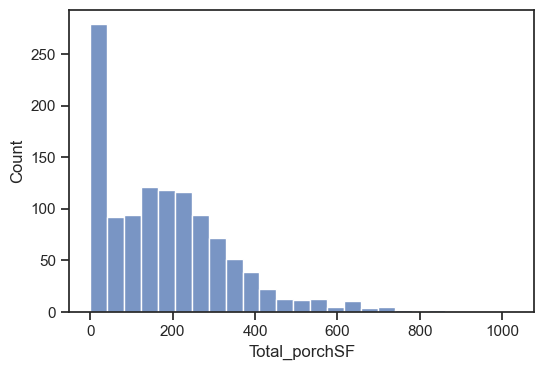

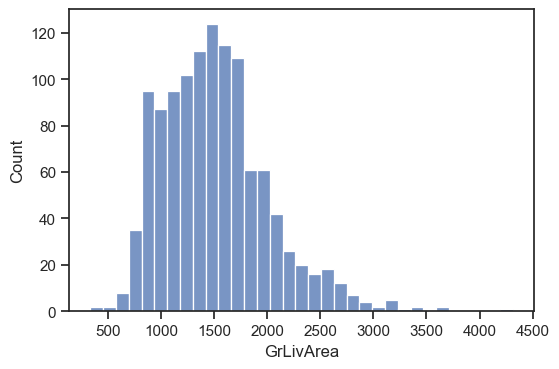

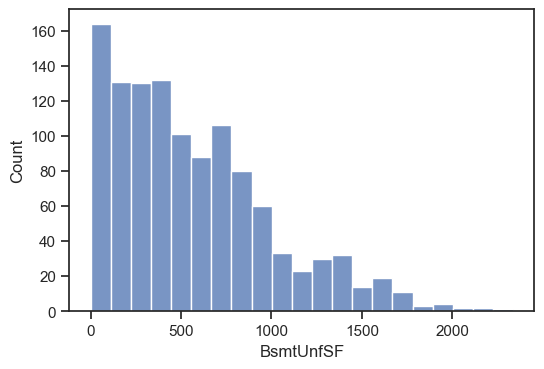

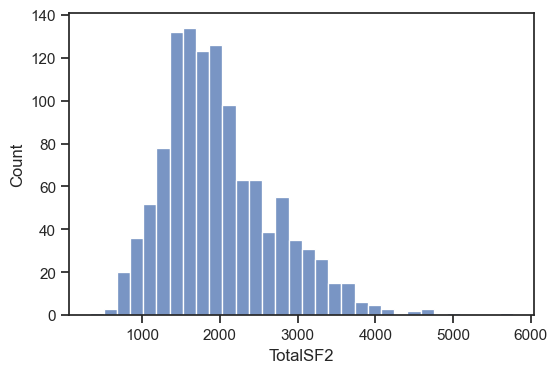

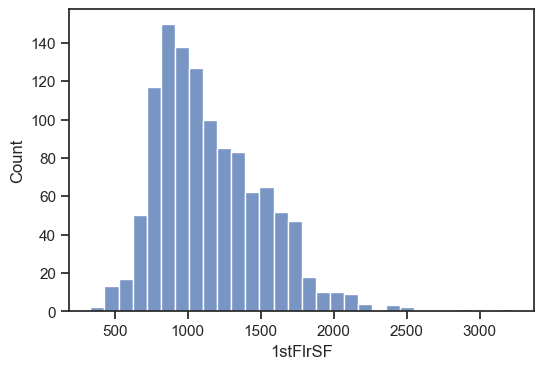

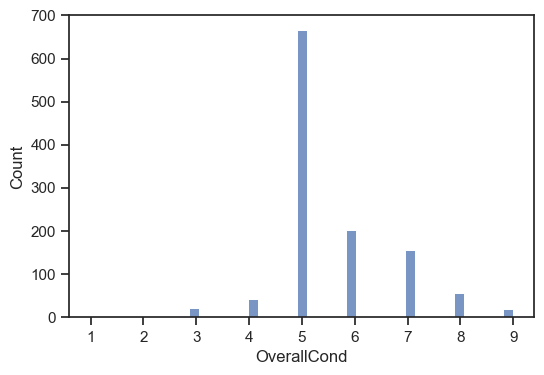

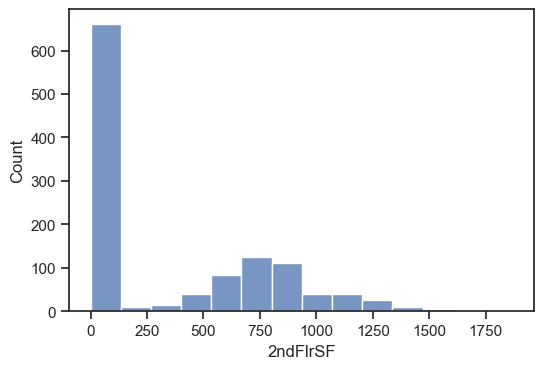

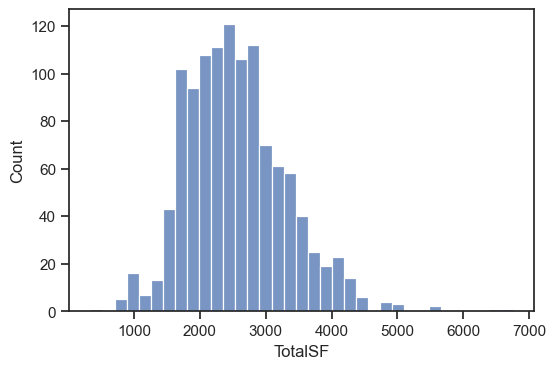

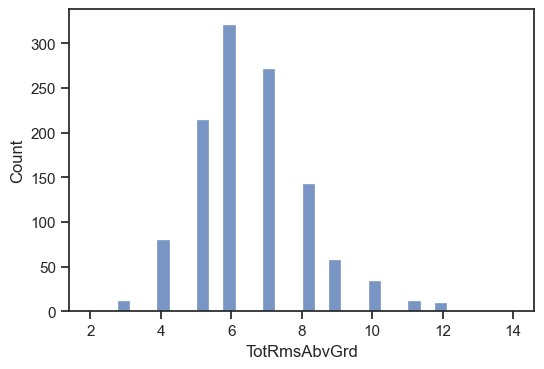

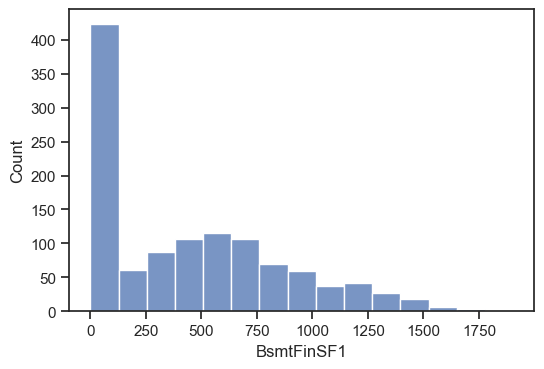

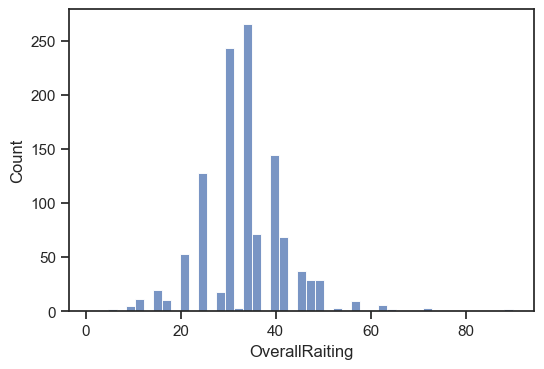

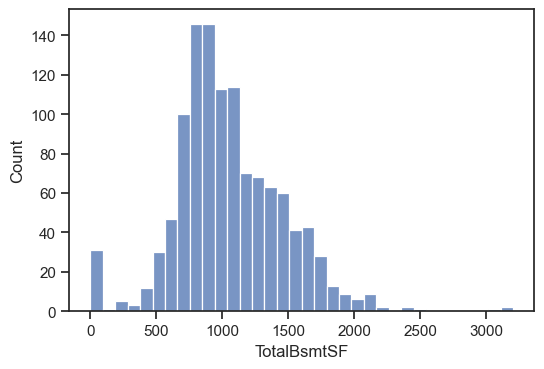

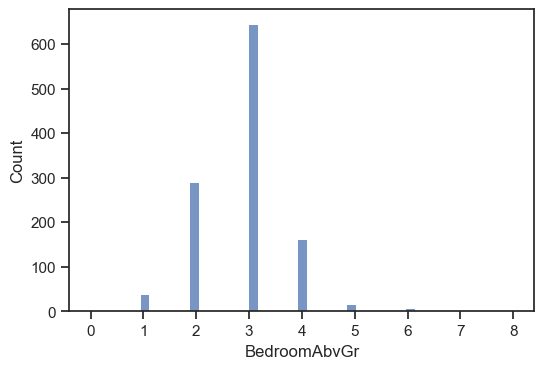

In [324]:
#Finding features with high skew and removing them unless not appropriate

from scipy.stats import skew
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerics = []
for i in X_d_train.columns:
    if X_d_train[i].dtype in numeric_dtypes:
        numerics.append(i)
skew_features = X_d_train[numerics].apply(lambda x: skew(x)).sort_values(ascending=False)

high_skew = skew_features[skew_features > 0.3]
skew_index = list(high_skew.index)
skew_index = [e for e in skew_index if e not in ('haspool','MSSubClass','MiscVal','PoolArea',
                                                '3SsnPorch', 'LowQualFinSF','KitchenAbvGr',
                                                'BsmtHalfBath', 'HalfBath', 'BsmtFullBath',
                                                'Fireplaces', 'LotArea')]
# skew_index
for i in skew_index:    
    fig, ax=plt.subplots()
    sns.histplot(X_d_train[i])
#     ax.figure.savefig('./images/Transformation/Pre/'+i+'.png', dpi=500)

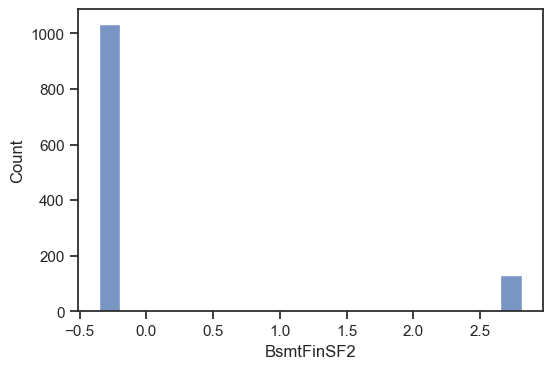

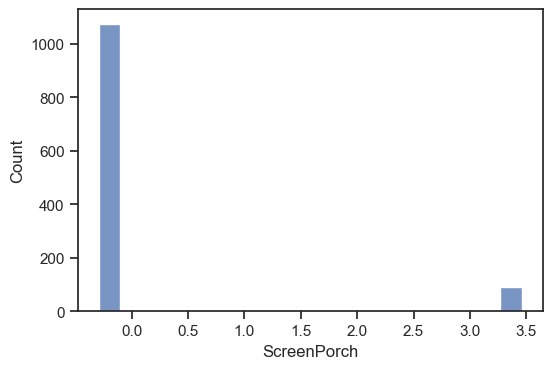

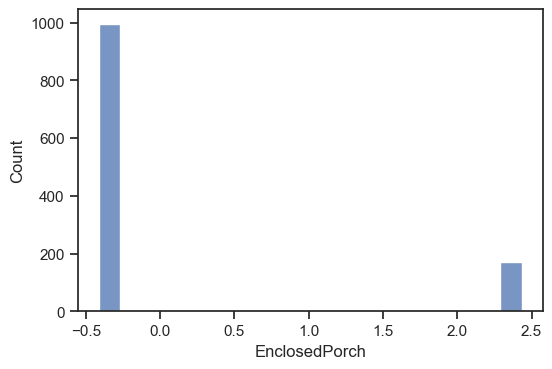

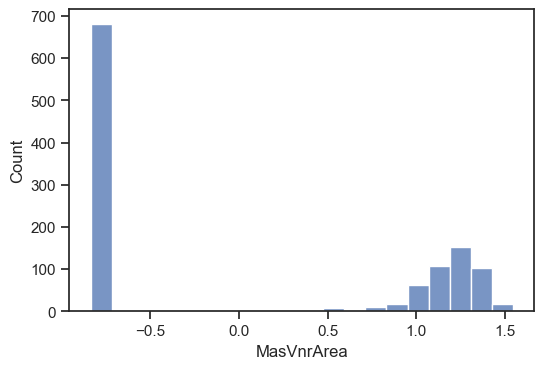

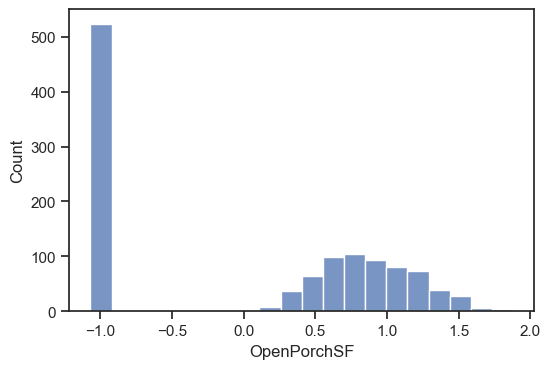

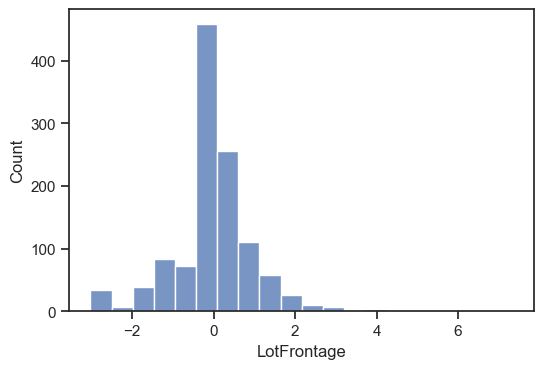

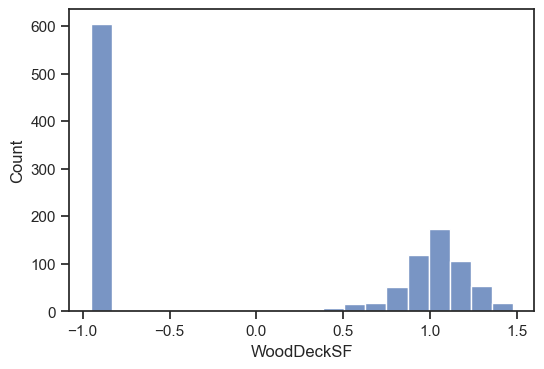

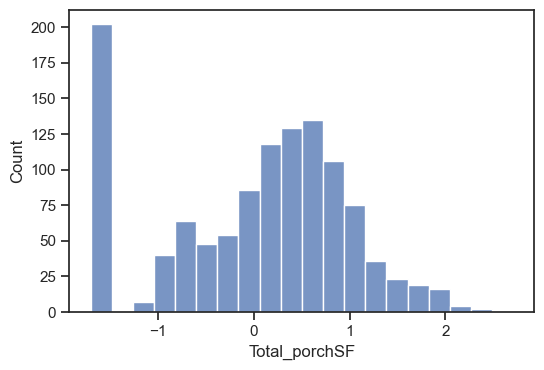

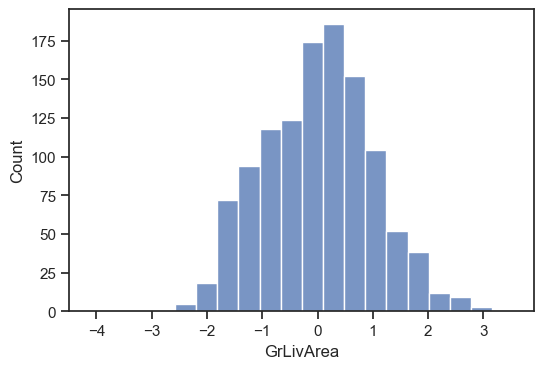

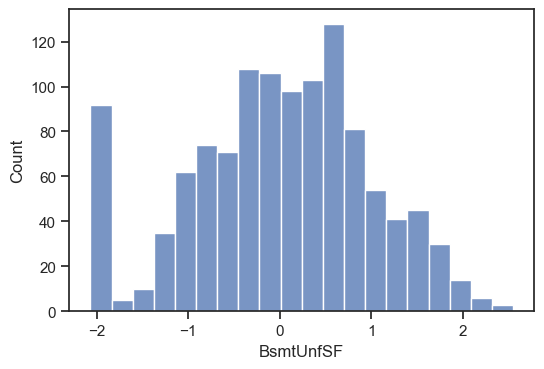

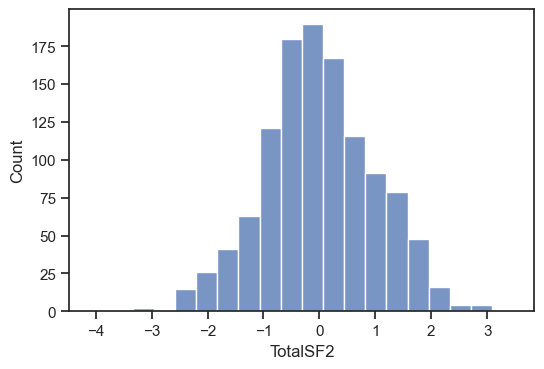

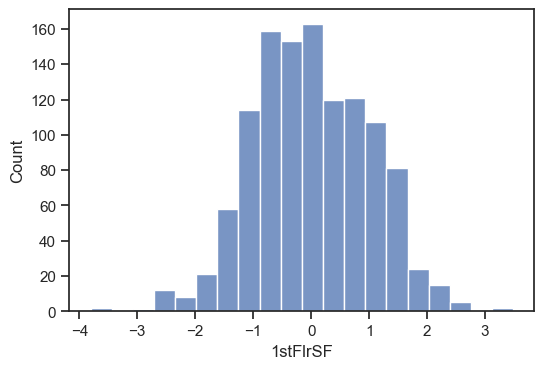

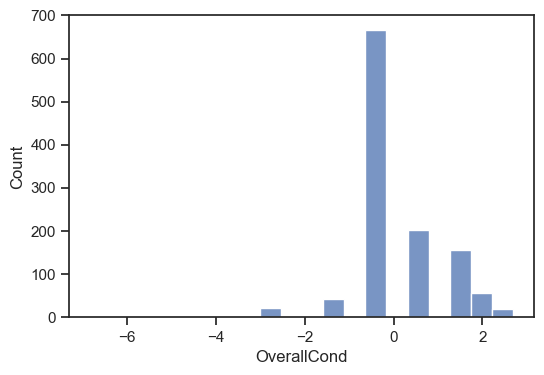

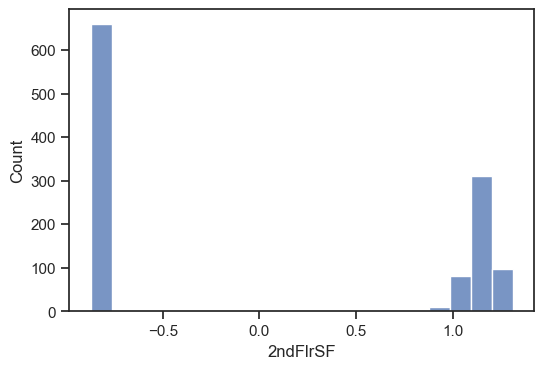

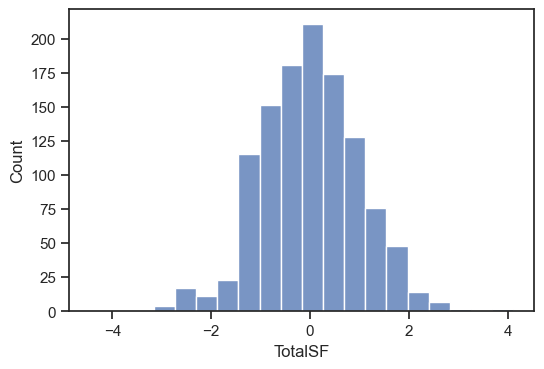

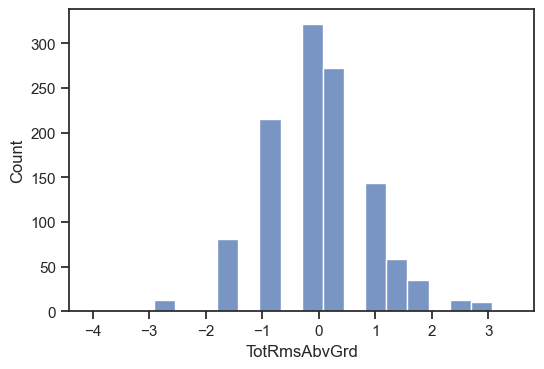

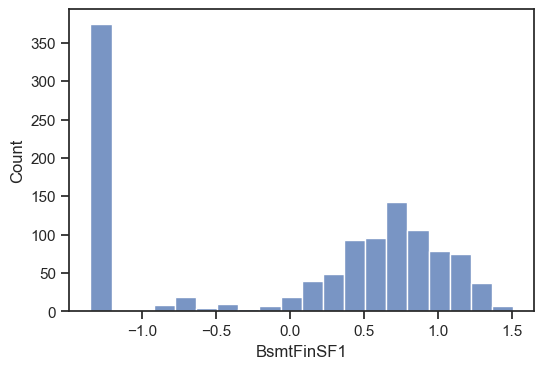

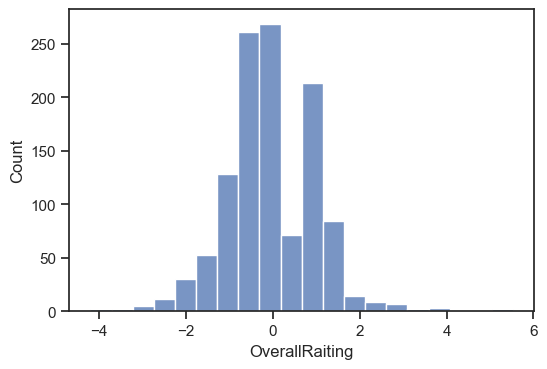

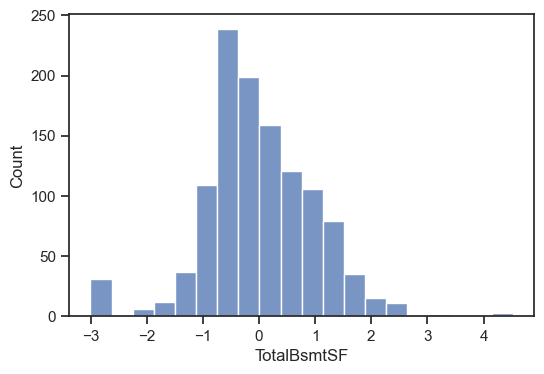

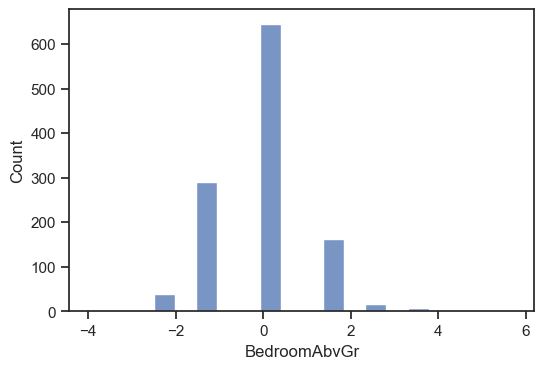

In [325]:
#Scaling features and creating new dataframe with scaled values

from sklearn.preprocessing import PowerTransformer
X_d_scaled_train = X_d_train.copy()
features = X_d_train[skew_index]
scaler = PowerTransformer(method='yeo-johnson').fit(features.values)
features = scaler.transform(features.values)
X_d_scaled_train[skew_index] = features


X_d_scaled_test = X_d_test.copy()
target = X_d_test[skew_index]
target = scaler.transform(target.values)
X_d_scaled_test[skew_index] = target

for i in skew_index:    
    fig, ax=plt.subplots()
    sns.histplot(X_d_scaled_train[i], bins=20)
#     ax.figure.savefig('./images/Transformation/Post/'+i+'.png', dpi=500)

### Dummy 2

C:\Users\Daniel\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


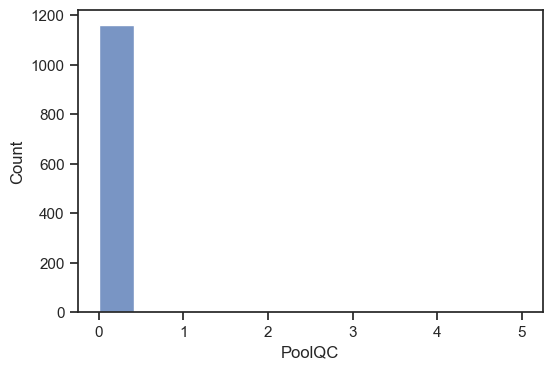

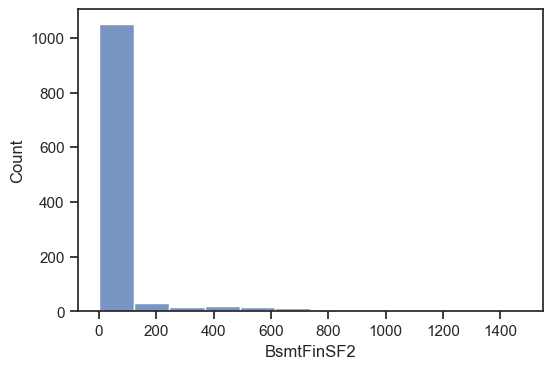

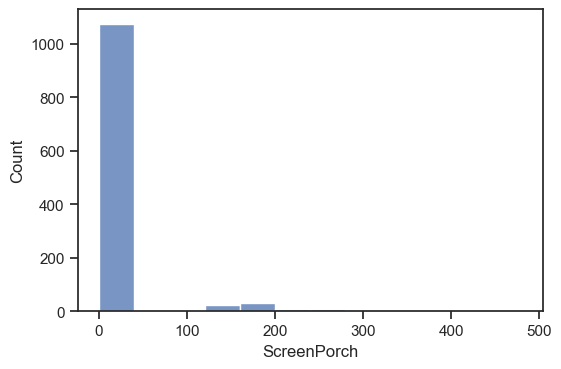

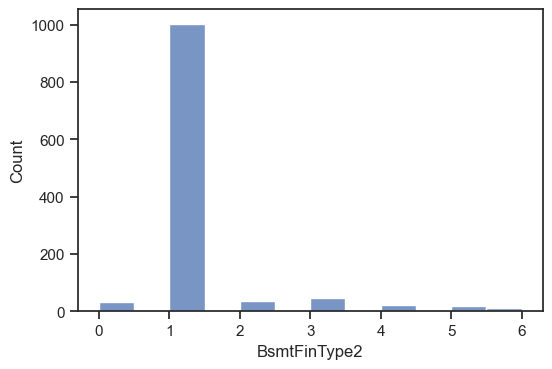

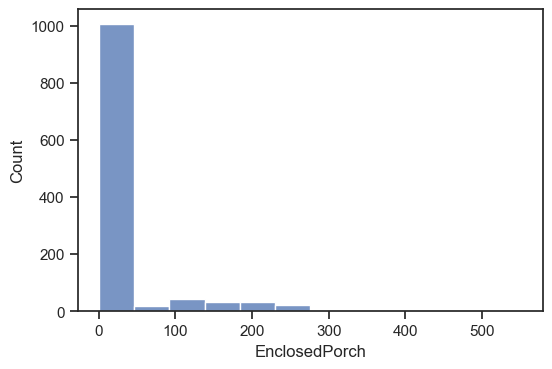

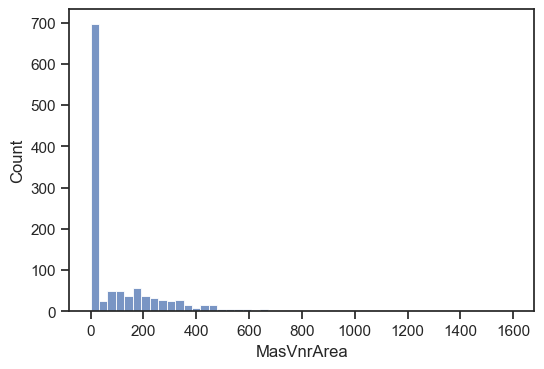

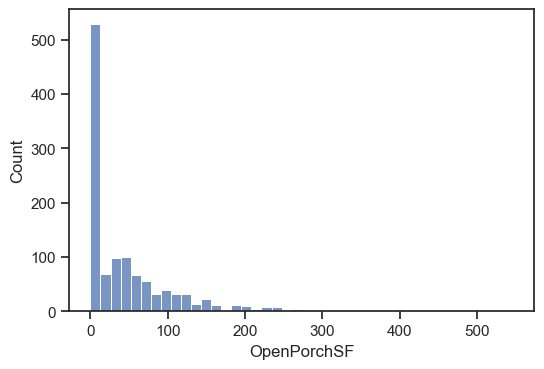

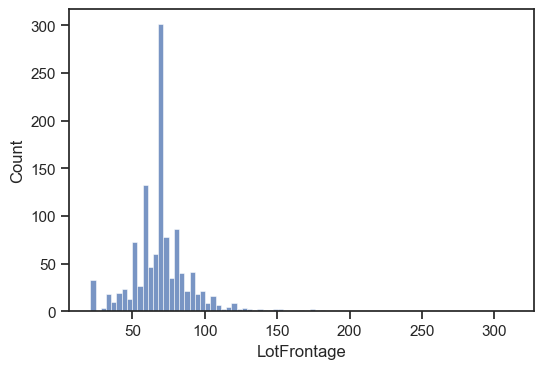

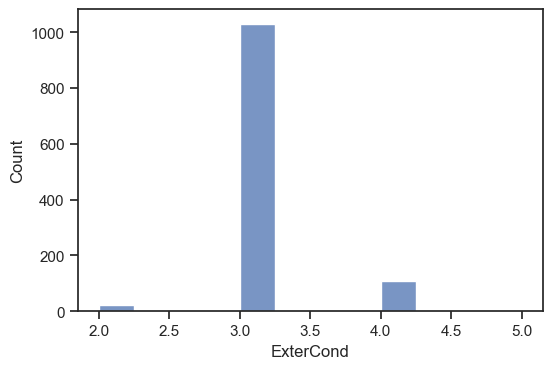

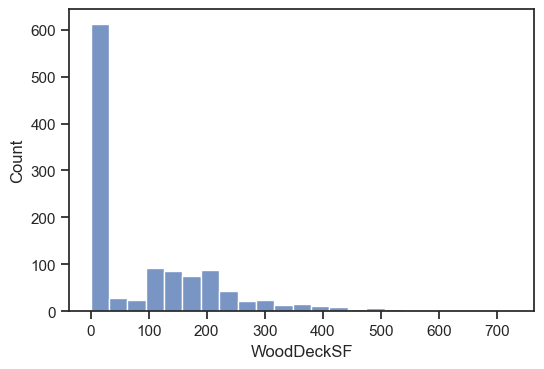

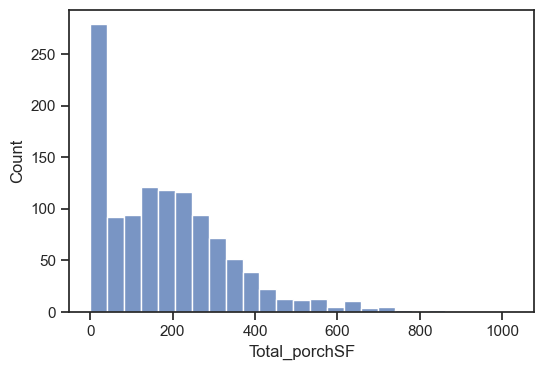

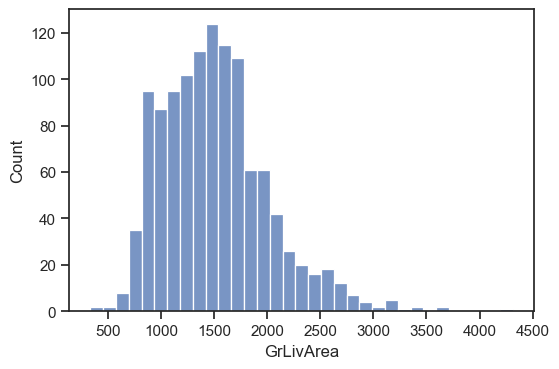

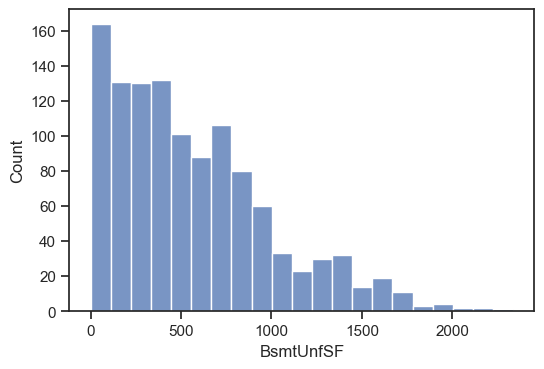

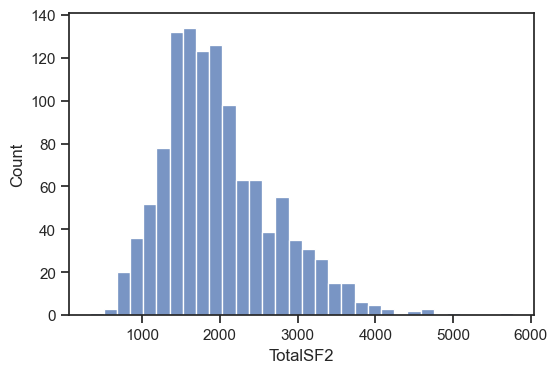

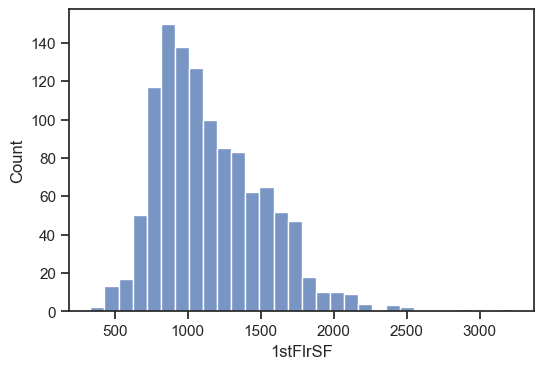

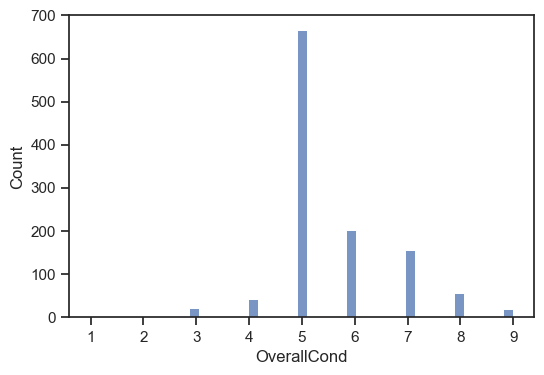

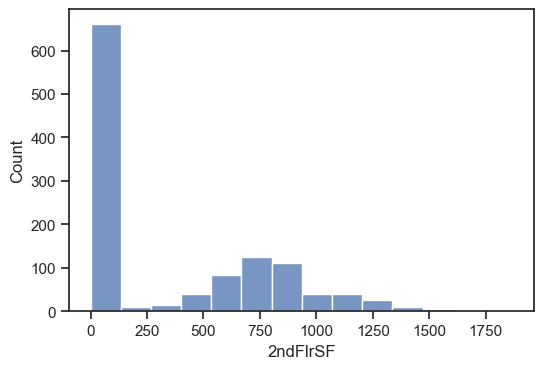

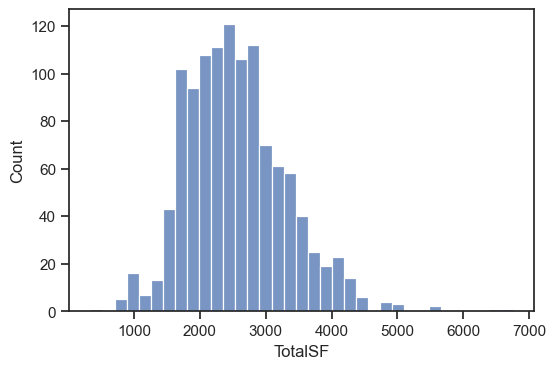

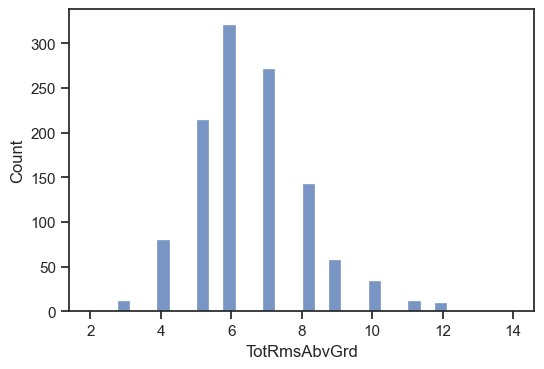

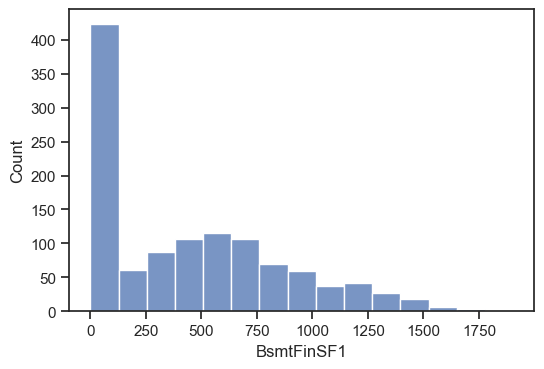

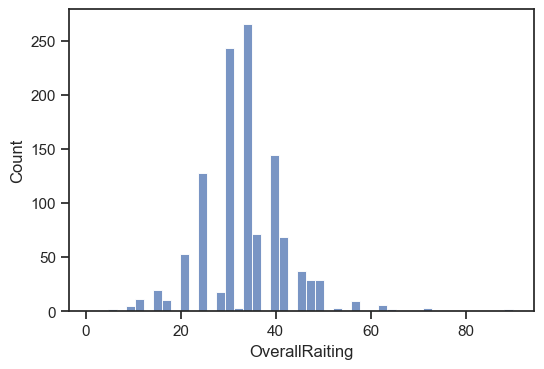

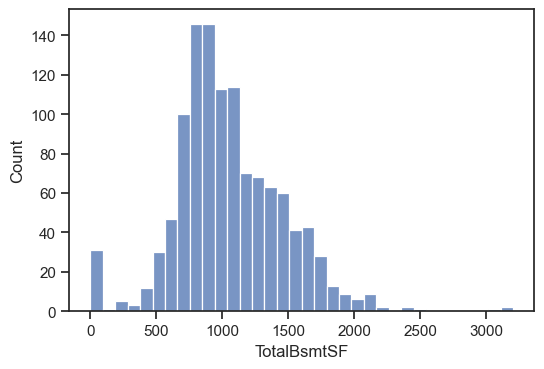

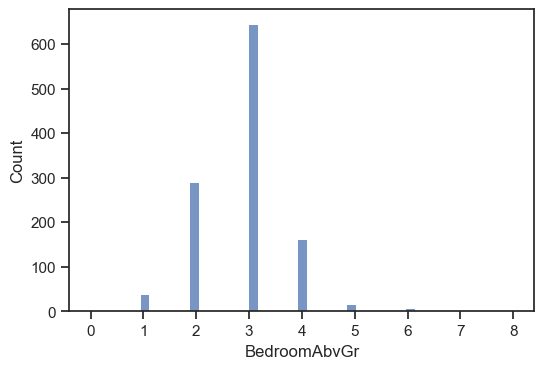

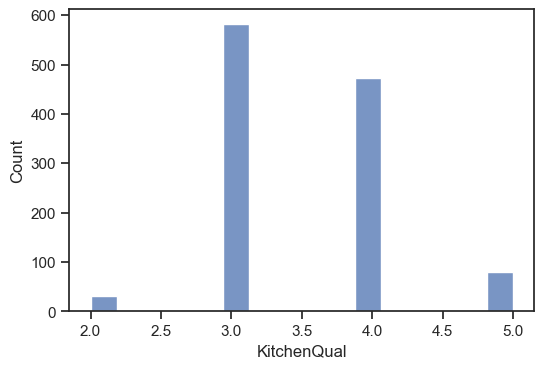

In [326]:
#Finding features with high skew and removing them unless not appropriate

from scipy.stats import skew
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerics = []
for i in X_d2_train.columns:
    if X_d2_train[i].dtype in numeric_dtypes:
        numerics.append(i)
skew_features = X_d2_train[numerics].apply(lambda x: skew(x)).sort_values(ascending=False)

high_skew = skew_features[skew_features > 0.3]
skew_index = list(high_skew.index)
skew_index = [e for e in skew_index if e not in ('haspool','MSSubClass','MiscVal','PoolArea',
                                                '3SsnPorch', 'LowQualFinSF','KitchenAbvGr',
                                                'BsmtHalfBath', 'HalfBath', 'BsmtFullBath',
                                                'Fireplaces', 'LotArea')]
# skew_index
for i in skew_index:    
    fig, ax=plt.subplots()
    sns.histplot(X_d2_train[i])
    ax.figure.savefig('./images/Transformation/Pre/'+i+'.png', dpi=500)

C:\Users\Daniel\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


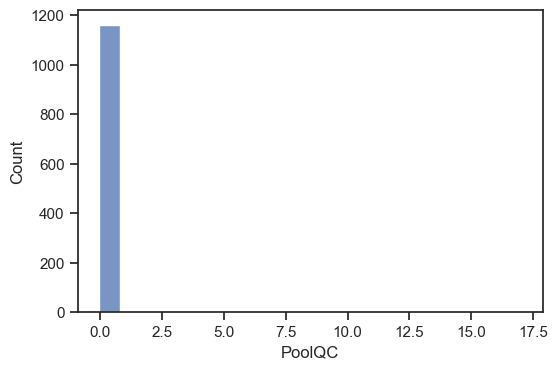

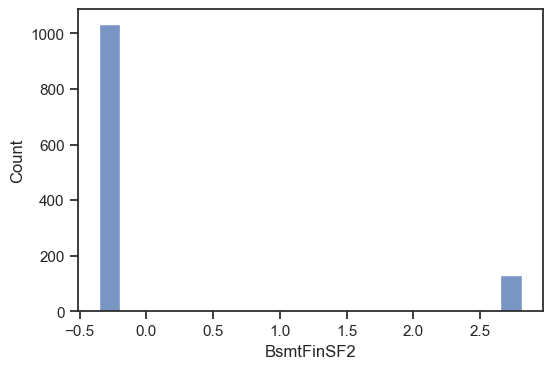

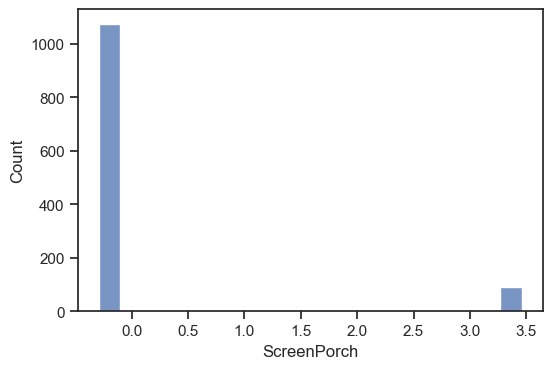

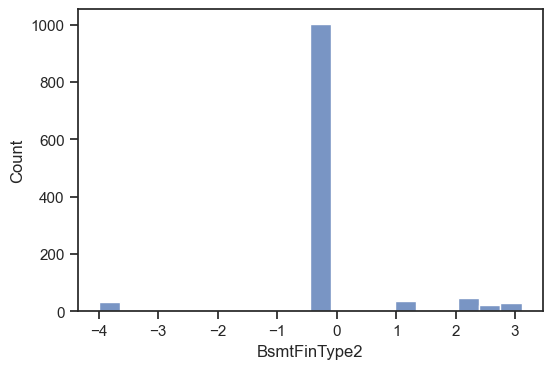

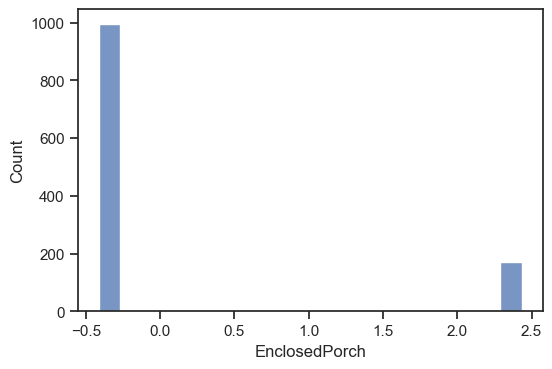

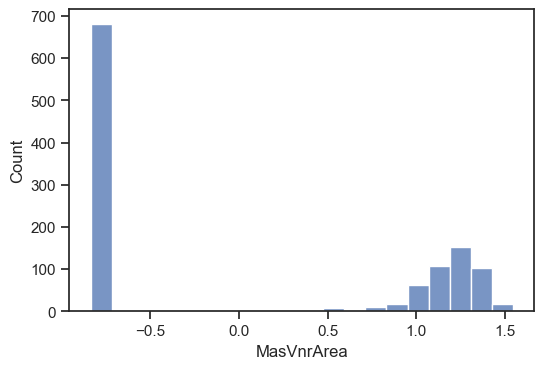

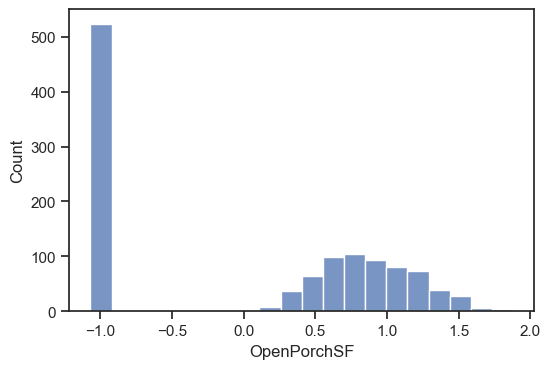

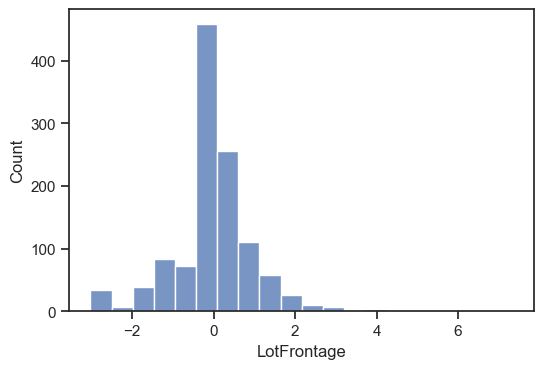

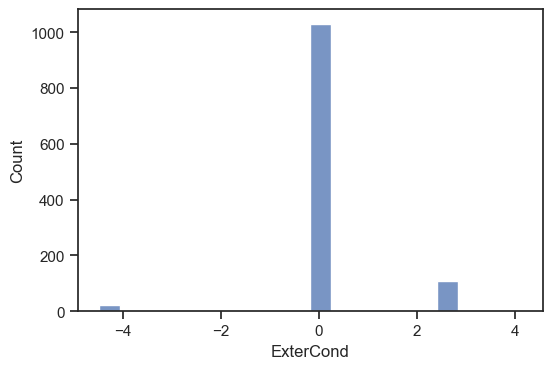

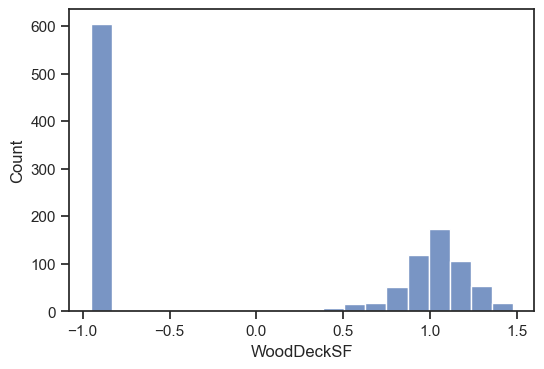

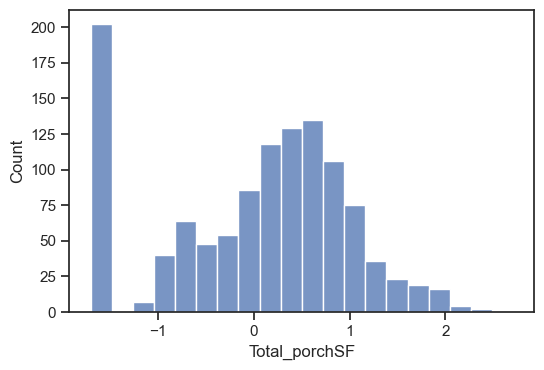

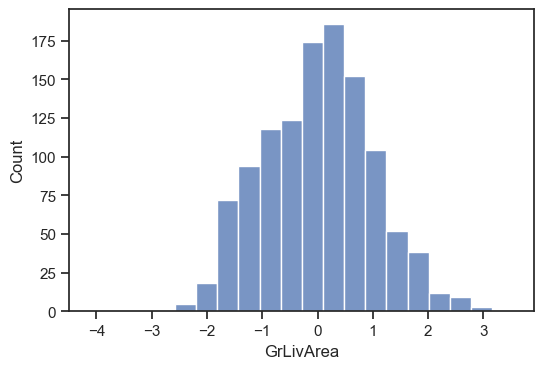

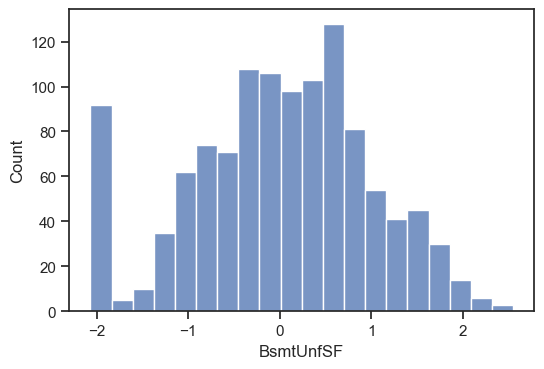

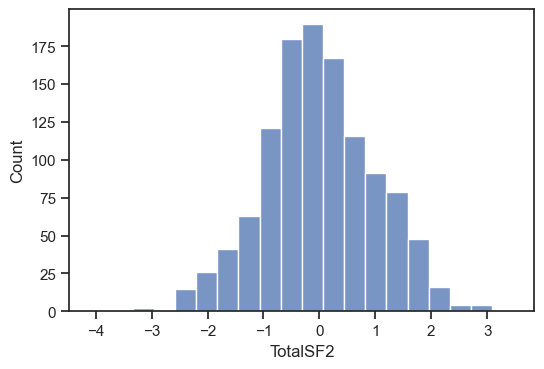

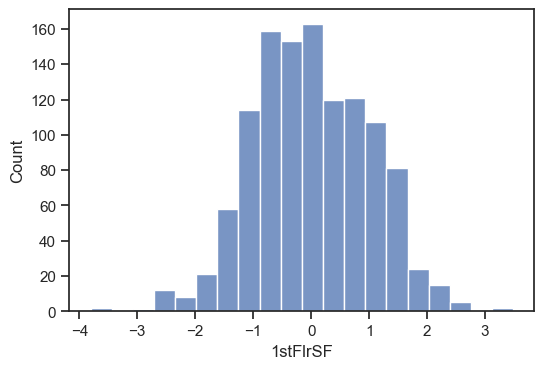

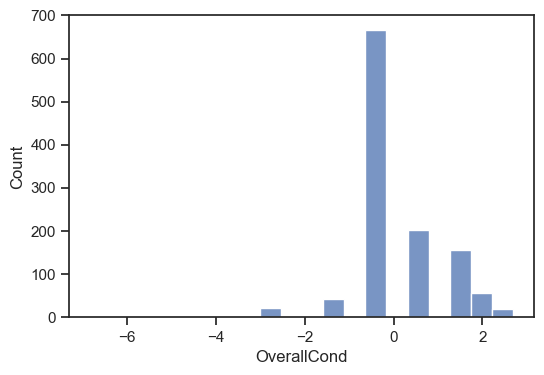

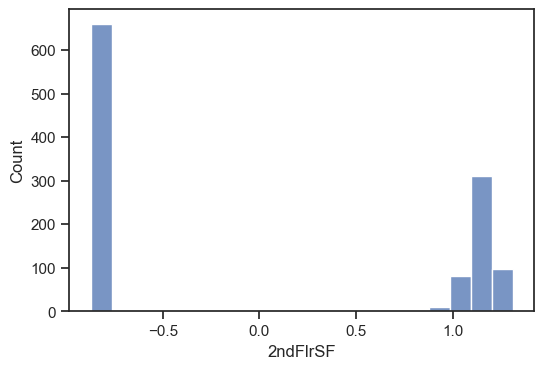

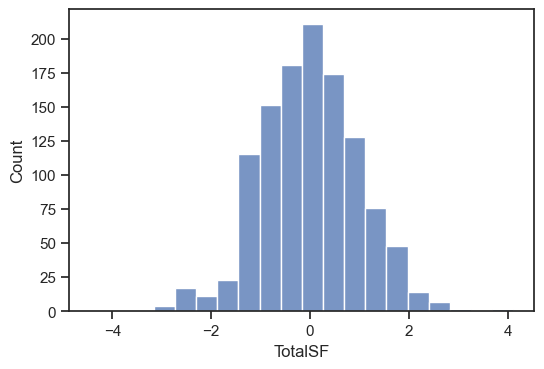

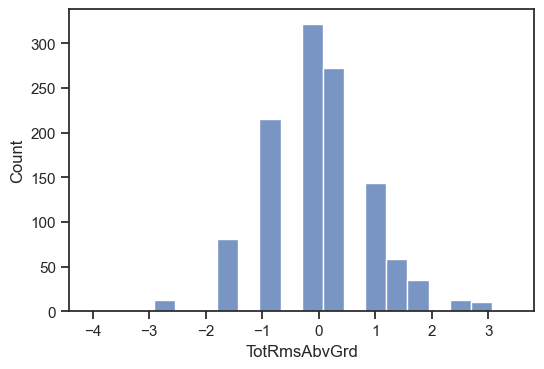

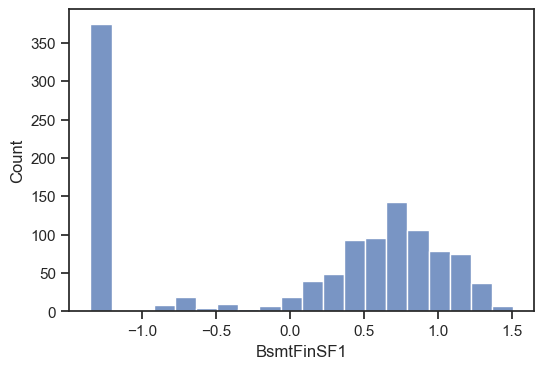

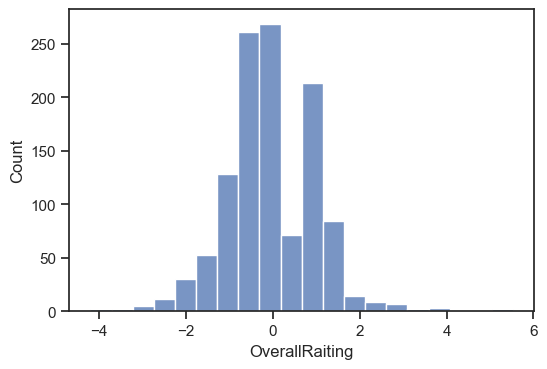

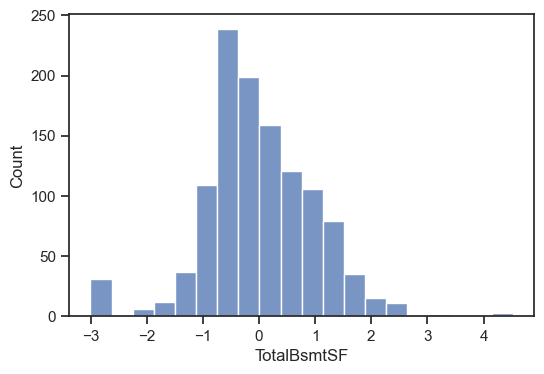

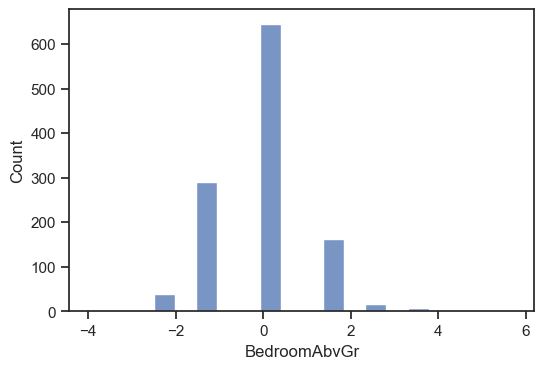

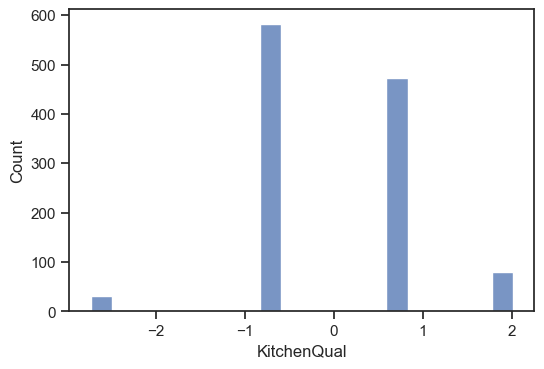

In [327]:
#Scaling features and creating new dataframe with scaled values

from sklearn.preprocessing import PowerTransformer
X_d2_scaled_train = X_d2_train.copy()
features = X_d2_train[skew_index]
scaler = PowerTransformer(method='yeo-johnson').fit(features.values)
features = scaler.transform(features.values)
X_d2_scaled_train[skew_index] = features


X_d2_scaled_test = X_d2_test.copy()
target = X_d2_test[skew_index]
target = scaler.transform(target.values)
X_d2_scaled_test[skew_index] = target

for i in skew_index:    
    fig, ax=plt.subplots()
    sns.histplot(X_d2_scaled_train[i], bins=20)
    ax.figure.savefig('./images/Transformation/Post/'+i+'.png', dpi=500)

## Modeling

In this section we will test different machine learning models and compare its results.

### Multiple Linear Regression Dummy 1

Dummmy 1 corresponds to the one where its one hot encoding, the order for the ordinal categories is lost.

In [328]:
from sklearn.linear_model import LinearRegression 

ols = LinearRegression()
ols.fit(X_d_scaled_train, y_d_train)
print("R^2 for train set: %f" %ols.score(X_d_scaled_train, y_d_train))

print('-'*50)

print("R^2 for test  set: %f" %ols.score(X_d_scaled_test, y_d_test))

R^2 for train set: 0.960154
--------------------------------------------------
R^2 for test  set: 0.870840


In [329]:
from sklearn.linear_model import Ridge, Lasso

alphas = np.linspace(0.1,2,30)
ridge1 = Ridge(normalize = True)
ridge1_scores_train = []
ridge1_scores_test  = []

for alpha in alphas:
            ridge1.set_params(alpha=alpha)
            ridge1.fit(X_d_scaled_train, y_d_train)
            ridge1_scores_train.append(ridge1.score(X_d_scaled_train, y_d_train))
            ridge1_scores_test.append(ridge1.score(X_d_scaled_test, y_d_test))
ridge1_scores_train = np.array(ridge1_scores_train) 
ridge1_scores_test  = np.array(ridge1_scores_test)

In [330]:
score_max = np.max(ridge1_scores_test)
print(score_max)
index = np.where(ridge1_scores_test == score_max)
alphas[index]

0.8968580211748667


array([0.36206897])

In [331]:
ridge1.set_params(alpha=float(alphas[index]))
ridge1.fit(X_d_scaled_train, y_d_train)
ridge1.score(X_d_scaled_test, y_d_test)

0.8968580211748667

Text(0, 0.5, '$R^2$')

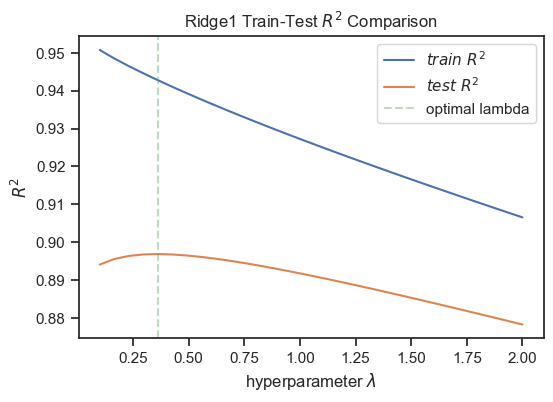

In [332]:
plt.plot(alphas, ridge1_scores_train, label=r'$train\ R^2$')
plt.plot(alphas, ridge1_scores_test, label=r'$test\ R^2$')
plt.legend(loc=1)
plt.title(r'Ridge1 Train-Test $R^2$ Comparison')
score_max = np.max(ridge1_scores_test)
index = np.where(ridge1_scores_test == score_max)
last_underfit  = alphas[index]
plt.axvline(last_underfit, linestyle='--', color='g', label='optimal lambda', alpha=0.4)
plt.legend(loc=1)
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'$R^2$')
# plt.savefig('./images/ridge1.png', dpi=500)

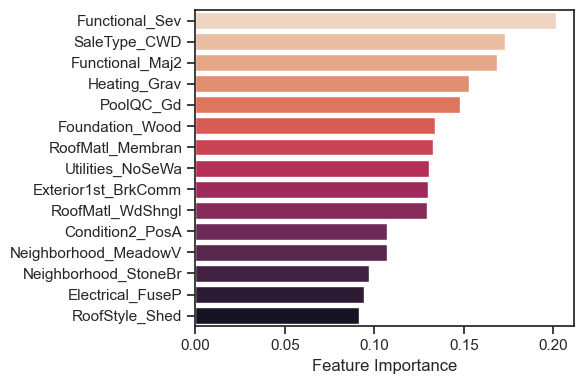

In [333]:
coefficients = pd.concat([pd.DataFrame(X_d_scaled_train.columns),
                          pd.DataFrame(np.transpose(abs(ridge1.coef_)))], axis = 1)
coefficients.columns = ('features', 'coefs')
coefficients = coefficients.sort_values(by='coefs',ascending=False)
f, ax = plt.subplots(figsize=(6, 4))
sns.barplot(x="coefs", y="features", data=coefficients[0:15], palette="rocket_r")
ax.set(ylabel="",
       xlabel="Feature Importance")
plt.tight_layout()
f.savefig('./images/feature_imp_ridge1.png', dpi=500)

In [334]:
alphas2 = np.linspace(0.00001,0.0010,50)
lasso1 = Lasso(normalize=True)
lasso1_scores_train = []
lasso1_scores_test  = []
for alpha in alphas2:
    lasso1.set_params(alpha=alpha)
    lasso1.fit(X_d_scaled_train, y_d_train)
    lasso1_scores_train.append(lasso1.score(X_d_scaled_train, y_d_train))
    lasso1_scores_test.append(lasso1.score(X_d_scaled_test, y_d_test))

lasso1_scores_train = np.array(lasso1_scores_train) 
lasso1_scores_test  = np.array(lasso1_scores_test)

In [335]:
score_max = np.max(lasso1_scores_test)
print(score_max)
index = np.where(lasso1_scores_test == score_max)
alphas2[index]

0.8948902493656309


array([5.04081633e-05])

In [336]:
lasso1.set_params(alpha=float(alphas2[index]))
lasso1.fit(X_d_scaled_train, y_d_train)
lasso1.score(X_d_scaled_test, y_d_test)

0.8948902493656309

Text(0, 0.5, '$R^2$')

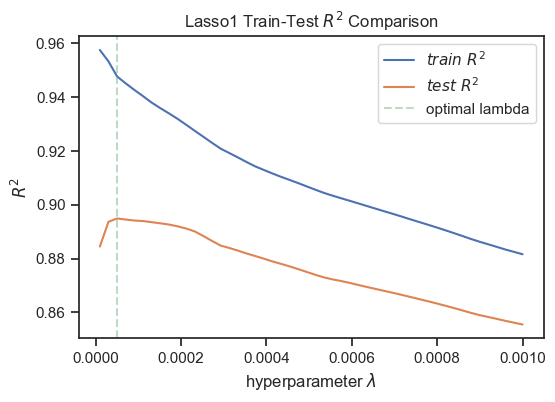

In [337]:
plt.plot(alphas2, lasso1_scores_train, label=r'$train\ R^2$')
plt.plot(alphas2, lasso1_scores_test, label=r'$test\ R^2$')
plt.title(r'Lasso1 Train-Test $R^2$ Comparison')
score_max = np.max(lasso1_scores_test)
index = np.where(lasso1_scores_test == score_max)
last_underfit  = alphas2[index]
plt.axvline(last_underfit, linestyle='--', color='g', label='optimal lambda', alpha=0.4)
plt.legend(loc=1)
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'$R^2$')
# plt.savefig('./images/lasso1.png', dpi=500)

[Text(0, 0.5, ''), Text(0.5, 0, 'Feature Importance')]

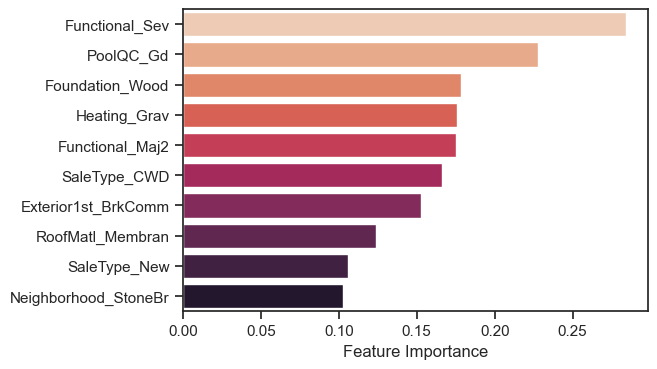

In [338]:
pd.options.display.max_rows = 30
coefficients = pd.concat([pd.DataFrame(X_d_scaled_train.columns),
                          pd.DataFrame(np.transpose(abs(lasso1.coef_)))], axis = 1)
coefficients.columns = ('features', 'coefs')
coefficients = coefficients.sort_values(by='coefs',ascending=False)
f, ax = plt.subplots(figsize=(6, 4))
sns.barplot(x="coefs", y="features", data=coefficients[0:10], palette="rocket_r")
ax.set(ylabel="",
       xlabel="Feature Importance")

### Multiple Linear Regression Dummy 2

Dummmy 2 corresponds to the one where one hot encoding is used only for nominal categorical variables, the order for the ordinal categories is kept by transforming it to a numerical value.

In [339]:
from sklearn.linear_model import LinearRegression 

ols = LinearRegression()
ols.fit(X_d2_scaled_train, y_d2_train)
print("R^2 for train set: %f" %ols.score(X_d2_scaled_train, y_d2_train))

print('-'*50)

print("R^2 for test  set: %f" %ols.score(X_d2_scaled_test, y_d2_test))

R^2 for train set: 0.958135
--------------------------------------------------
R^2 for test  set: 0.865028


In [340]:
from sklearn.linear_model import Ridge, Lasso

alphas = np.linspace(0.1,2,30)
ridge2 = Ridge(normalize = True)
ridge2_scores_train = []
ridge2_scores_test  = []

for alpha in alphas:
            ridge2.set_params(alpha=alpha)
            ridge2.fit(X_d2_scaled_train, y_d2_train)
            ridge2_scores_train.append(ridge2.score(X_d2_scaled_train, y_d2_train))
            ridge2_scores_test.append(ridge2.score(X_d2_scaled_test, y_d2_test))
ridge2_scores_train = np.array(ridge2_scores_train) 
ridge2_scores_test  = np.array(ridge2_scores_test)

In [341]:
score_max = np.max(ridge2_scores_test)
print(score_max)
index = np.where(ridge2_scores_test == score_max)
alphas[index]

0.8964560087043056


array([0.36206897])

In [342]:
ridge2.set_params(alpha=float(alphas[index]))
ridge2.fit(X_d2_scaled_train, y_d2_train)
ridge2.score(X_d2_scaled_test, y_d2_test)

0.8964560087043056

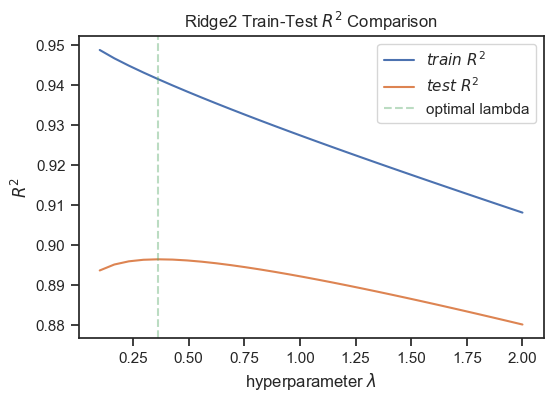

In [343]:
plt.plot(alphas, ridge2_scores_train, label=r'$train\ R^2$')
plt.plot(alphas, ridge2_scores_test, label=r'$test\ R^2$')
plt.legend(loc=1)
plt.title(r'Ridge2 Train-Test $R^2$ Comparison')
score_max = np.max(ridge2_scores_test)
index = np.where(ridge2_scores_test == score_max)
last_underfit  = alphas[index]
plt.axvline(last_underfit, linestyle='--', color='g', label='optimal lambda', alpha=0.4)
plt.legend(loc=1)
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'$R^2$')
plt.savefig('./images/ridge2.png', dpi=500)

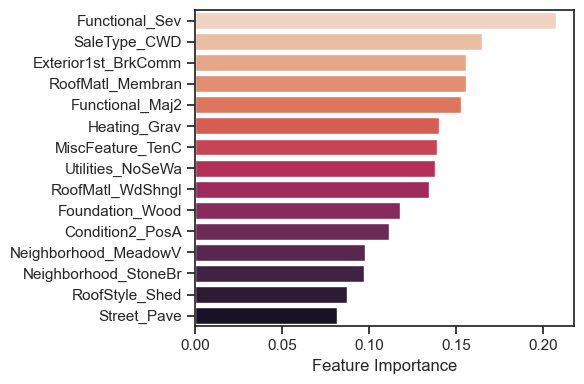

In [344]:
coefficients = pd.concat([pd.DataFrame(X_d2_scaled_train.columns),
                          pd.DataFrame(np.transpose(abs(ridge2.coef_)))], axis = 1)
coefficients.columns = ('features', 'coefs')
coefficients = coefficients.sort_values(by='coefs',ascending=False)
f, ax = plt.subplots(figsize=(6, 4))
sns.barplot(x="coefs", y="features", data=coefficients[0:15], palette="rocket_r")
ax.set(ylabel="",
       xlabel="Feature Importance")
plt.tight_layout()
# f.savefig('./images/feature_imp_ridge2.png', dpi=500)

In [345]:
alphas2 = np.linspace(0.00005,0.0010,50)
lasso2 = Lasso(normalize=True)
lasso2_scores_train = []
lasso2_scores_test  = []
for alpha in alphas2:
    lasso2.set_params(alpha=alpha)
    lasso2.fit(X_d2_scaled_train, y_d2_train)
    lasso2_scores_train.append(lasso2.score(X_d2_scaled_train, y_d2_train))
    lasso2_scores_test.append(lasso2.score(X_d2_scaled_test, y_d2_test))

lasso2_scores_train = np.array(lasso2_scores_train) 
lasso2_scores_test  = np.array(lasso2_scores_test)

In [346]:
score_max = np.max(lasso2_scores_test)
print(score_max)
index = np.where(lasso2_scores_test == score_max)
alphas2[index]

0.8965190012644223


array([0.00010816])

In [347]:
lasso2.set_params(alpha=float(alphas2[index]))
lasso2.fit(X_d2_scaled_train, y_d2_train)
lasso2.score(X_d2_scaled_test, y_d2_test)

0.8965190012644223

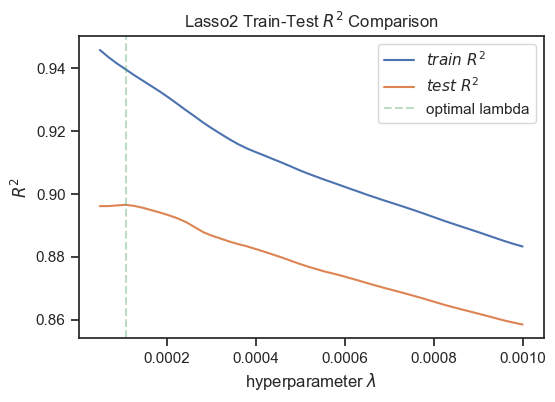

In [348]:
plt.plot(alphas2, lasso2_scores_train, label=r'$train\ R^2$')
plt.plot(alphas2, lasso2_scores_test, label=r'$test\ R^2$')
plt.title(r'Lasso2 Train-Test $R^2$ Comparison')
score_max = np.max(lasso2_scores_test)
index = np.where(lasso2_scores_test == score_max)
last_underfit  = alphas2[index]
plt.axvline(last_underfit, linestyle='--', color='g', label='optimal lambda', alpha=0.4)
plt.legend(loc=1)
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'$R^2$')
plt.savefig('./images/lasso2.png', dpi=500)

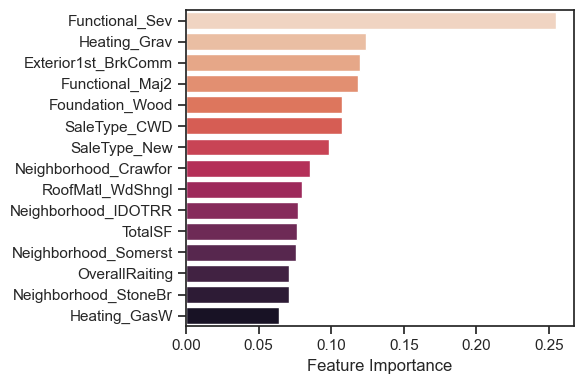

In [349]:
pd.options.display.max_rows = 30
coefficients = pd.concat([pd.DataFrame(X_d2_scaled_train.columns),
                          pd.DataFrame(np.transpose(abs(lasso2.coef_)))], axis = 1)
coefficients.columns = ('features', 'coefs')
coefficients = coefficients.sort_values(by='coefs',ascending=False)
f, ax = plt.subplots(figsize=(6, 4))
sns.barplot(x="coefs", y="features", data=coefficients[0:15], palette="rocket_r")
ax.set(ylabel="",
       xlabel="Feature Importance")
plt.tight_layout()
f.savefig('./images/feature_imp_lasso2.png', dpi=500)

### Support Vector Machines Dummy 1

In [350]:
from sklearn.svm import SVR
import sklearn.model_selection as ms

svr = SVR()
svr.set_params(kernel='rbf')
grid_para_svr = {'C':[147],
                 'gamma':[9e-09],
                'epsilon':[0.1]}

grid_search_svr = ms.GridSearchCV(svr, grid_para_svr, cv=5, return_train_score = True, n_jobs = -1)

%time grid_search_svr.fit(X_d_scaled_train, y_d_train)

# get the best parameters
print(grid_search_svr.best_params_)

# get the training/test errors
print("The training accuracy is: %.5f" % (grid_search_svr.best_score_))
print("The test     accuracy is: %.5f" % (grid_search_svr.best_estimator_.score(X_d_scaled_test, y_d_test)))

Wall time: 5.43 s
{'C': 147, 'epsilon': 0.1, 'gamma': 9e-09}
The training accuracy is: 0.62957
The test     accuracy is: 0.66880


In [351]:
svr_best = grid_search_svr.best_estimator_.fit(X_d_scaled_test, y_d_test) 

### Random Forest

In [352]:
from sklearn import ensemble

randomForest = ensemble.RandomForestRegressor()

randomForest.set_params(random_state=0)

randomForest.fit(X_le_train, y_le_train) 

print("The training accuracy is: %.5f" % (randomForest.score(X_le_train, y_le_train)))
print("The test     accuracy is: %.5f" % (randomForest.score(X_le_test, y_le_test)))

The training accuracy is: 0.98458
The test     accuracy is: 0.87861


In [353]:
# set the parameter grid
import sklearn.model_selection as ms

randomForest.set_params(random_state = 0, max_features = 'sqrt')

grid_para_forest = {
    #'max_features' : ('sqrt', 'auto'),
    'max_depth': [16],
    'n_estimators': [135]
}

# run the RF classifier through the grid search
grid_search_forest = ms.GridSearchCV(randomForest, grid_para_forest, cv=5, n_jobs=-1)
%time grid_search_forest.fit(X_le_train, y_le_train)


# get the best parameters
print(grid_search_forest.best_params_)

# get the training/test errors
print("The training accuracy is: %.5f" % (grid_search_forest.best_score_))
print("The test     accuracy is: %.5f" % (grid_search_forest.best_estimator_.score(X_le_test, y_le_test)))

Wall time: 2.06 s
{'max_depth': 16, 'n_estimators': 135}
The training accuracy is: 0.89201
The test     accuracy is: 0.89328


In [354]:
randomForest_best = grid_search_forest.best_estimator_.fit(X_le_train, y_le_train) 

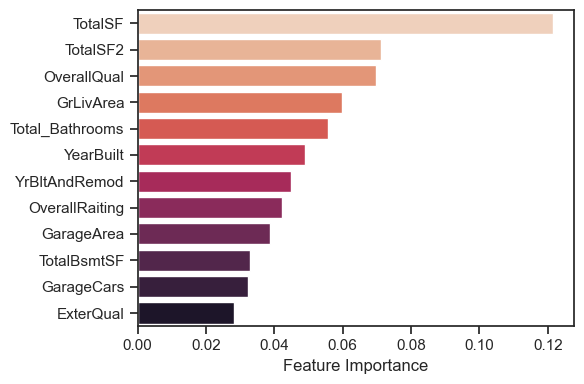

In [355]:
coefficients = pd.concat([pd.DataFrame(X_le_train.columns),
                          pd.DataFrame(randomForest_best.feature_importances_)], axis = 1)
coefficients.columns = ('features', 'coefs')
coefficients = coefficients.sort_values(by='coefs',ascending=False)
f, ax = plt.subplots(figsize=(6, 4))
sns.barplot(x="coefs", y="features", data=coefficients[0:12], palette="rocket_r")
ax.set(ylabel="",
       xlabel="Feature Importance")
plt.tight_layout()
f.savefig('./images/feature_imp_RF.png', dpi=500)

### XGBoost

In [356]:
from xgboost import XGBRegressor
from datetime import datetime
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

params = {
        'reg_alpha': [0.00007],
        'gamma': [0],
        'subsample': [0.5],
        'colsample_bytree': [0.7],
        'max_depth': [5]
        }

xgb = XGBRegressor(learning_rate=0.01,n_estimators=3500, eval_metric='rmse',
                       scale_pos_weight=1, seed=21, min_child_weight = 1)

grid_search_xgb = GridSearchCV(xgb, param_grid=params, n_jobs=7, cv=5)

%time grid_search_xgb.fit(X_le_train, y_le_train)

print('\n Best parameters:')
print(grid_search_xgb.best_params_)

print("The training accuracy is: %.5f" % (grid_search_xgb.best_score_))
print("The test     accuracy is: %.5f" % (grid_search_xgb.best_estimator_.score(X_le_test, y_le_test)))

Wall time: 22.3 s

 Best parameters:
{'colsample_bytree': 0.7, 'gamma': 0, 'max_depth': 5, 'reg_alpha': 7e-05, 'subsample': 0.5}
The training accuracy is: 0.91848
The test     accuracy is: 0.88757


In [357]:
xgb = XGBRegressor(learning_rate=0.01,n_estimators=3500, eval_metric='rmse',
                   scale_pos_weight=1, seed=21, min_child_weight = 1,
                  colsample_bytree = 0.7, gamma = 0, max_depth = 5, reg_alpha = 0.00007, subsample = 0.5)

xgb.fit(X_le_train, y_le_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, eval_metric='rmse',
             gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.01, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=3500, n_jobs=8,
             num_parallel_tree=1, random_state=21, reg_alpha=7e-05,
             reg_lambda=1, scale_pos_weight=1, seed=21, subsample=0.5,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [358]:
xgb.score(X_le_test, y_le_test)

0.8875653539121099

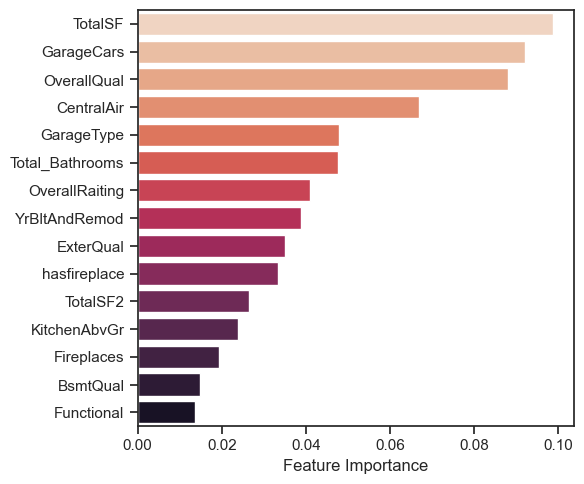

In [359]:
feature_importance = pd.concat([pd.DataFrame(X_le_train.columns),
                          pd.DataFrame(xgb.feature_importances_)], axis = 1)
feature_importance.columns = ('features', 'coefs')
feature_importance = feature_importance.sort_values(by='coefs',ascending=False)
f, ax = plt.subplots(figsize=(6, 5))
sns.barplot(x="coefs", y="features", data=feature_importance[0:15], palette="rocket_r")
ax.set(ylabel="",
       xlabel="Feature Importance")
plt.tight_layout()
f.savefig('./images/feature_imp_XGB.png', dpi=500)

## Analyzing Results

### Comparing Models

In [360]:
from sklearn import metrics
import math
rmse_r1 = np.sqrt(metrics.mean_squared_error(y_d_test, ridge1.predict(X_d_scaled_test)))
rmse_l1 = np.sqrt(metrics.mean_squared_error(y_d_test, lasso1.predict(X_d_scaled_test)))
rmse_r2 = np.sqrt(metrics.mean_squared_error(y_d2_test, ridge2.predict(X_d2_scaled_test)))
rmse_l2 = np.sqrt(metrics.mean_squared_error(y_d2_test, lasso2.predict(X_d2_scaled_test)))
rmse_svr = np.sqrt(metrics.mean_squared_error(y_d_test, svr_best.predict(X_d_scaled_test)))
rmse_rf = np.sqrt(metrics.mean_squared_error(y_le_test, randomForest_best.predict(X_le_test)))
rmse_xgb = np.sqrt(metrics.mean_squared_error(y_le_test, xgb.predict(X_le_test)))

In [361]:
print(rmse_r1.mean())
print(rmse_l1.mean())
print(rmse_r2.mean())
print(rmse_l2.mean())
print(rmse_svr.mean())
print(rmse_rf.mean())
print(rmse_xgb.mean())

0.1246198406061509
0.1258029904129578
0.12486246736448532
0.12482448059670076
0.19991493220527187
0.126762747939504
0.13011265544507308


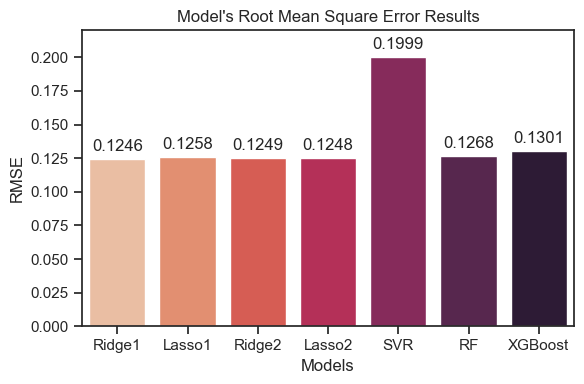

In [248]:
rmse_results = [rmse_r1.mean(), rmse_l1.mean(), rmse_r2.mean(),
                rmse_l2.mean(), rmse_svr.mean(), rmse_rf.mean(), rmse_xgb.mean()]

names = ['Ridge1','Lasso1','Ridge2','Lasso2','SVR','RF','XGBoost']

f, ax = plt.subplots()
a = sns.barplot(x=names, y=rmse_results, palette="rocket_r")
for p in a.patches:
    a.annotate(format(p.get_height(), '.4f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.ylim(0, 0.22)
ax.set(ylabel="RMSE",
       xlabel="Models",
      title="Model's Root Mean Square Error Results")
plt.tight_layout()
f.savefig('./images/models_RMSE.png', dpi=500)

### Interpreting Results

In this section I want to get some interpretable results so I will bring back predicted and actual results of the best model back from log to normal then get the RMSE so we can get an idea of how accurate our average prediction will be.

In [148]:
names = ['ridge1','lasso1','ridge2','lasso2','svr_best','randomForest_best','xgb']
models = [ridge1,lasso1,ridge2,lasso2,svr_best,randomForest_best,xgb]
features = [X_d_scaled_test,X_d_scaled_test,X_d2_scaled_test,X_d2_scaled_test,X_d_scaled_test,X_le_test,X_le_test]
targets = [y_d_test,y_d_test,y_d2_test,y_d2_test,y_d_test,y_le_test,y_le_test]
for name, model, value, target in zip(names, models, features, targets):

    predicted_values = model.predict(value)
    predicted_values = np.exp(predicted_values)
    y_d_test_exp = np.exp(target)
    mse = metrics.mean_squared_error(y_d_test_exp, predicted_values)
    rmse = math.sqrt(mse)
#     print('The RMSE for '+name+' is %.0f'% rmse)
    rmspe = (np.sqrt(np.mean(np.square((y_d_test_exp - predicted_values) / y_d_test_exp)))) * 100
    print('The RMSPE is for '+name+' is %.2f %%'% rmspe)

The RMSPE is for ridge1 is 13.91 %
The RMSPE is for lasso1 is 14.13 %
The RMSPE is for ridge2 is 13.98 %
The RMSPE is for lasso2 is 14.04 %
The RMSPE is for svr_best is 20.80 %
The RMSPE is for randomForest_best is 14.36 %
The RMSPE is for xgb is 14.60 %


The RMSE is 27912
The RMSPE is 13.91 %


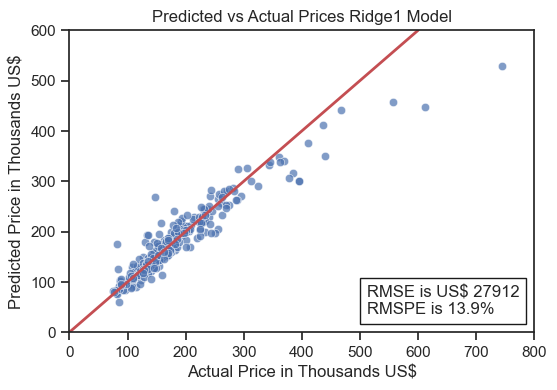

In [371]:
predicted_values = ridge1.predict(X_d_scaled_test)

predicted_values = np.exp(predicted_values)

y_d_test_exp = np.exp(y_d_test)

mse = metrics.mean_squared_error(y_d_test_exp, predicted_values)

rmse = math.sqrt(mse)

print('The RMSE is %.0f'% rmse)

rmspe = (np.sqrt(np.mean(np.square((y_d_test_exp - predicted_values) / y_d_test_exp)))) * 100

print('The RMSPE is %.2f %%'% rmspe)

f, ax = plt.subplots()
sns.scatterplot(x=y_d_test_exp, y=predicted_values, alpha=0.7)
ax.set(ylabel="Predicted Price in Thousands US$",
       xlabel="Actual Price in Thousands US$",
      title="Predicted vs Actual Prices Ridge1 Model")
plt.yticks(ax.get_yticks(), (ax.get_yticks() / 1000).astype(int))
plt.xticks(ax.get_xticks(), (ax.get_xticks() / 1000).astype(int))
plt.ylim(0)
plt.xlim(0)
at = AnchoredText('RMSE is US$ %.0f\nRMSPE is %.1f%%'% (rmse, rmspe),
                  prop=dict(size=12), frameon=True,
                  loc='lower right')
ax.add_artist(at)
plt.plot([600000, 0], [600000, 0], linewidth=2, color="r")
f.savefig('./images/PredictesVsActuals_Ridge.png', dpi=500)

In [392]:
#RMSE and RMSPE for Houses under US$ 400k predicted value
index = predicted_values<400000
predicted_values2 = predicted_values[index]
y_d_test_exp2 = y_d_test_exp[index]

mse = metrics.mean_squared_error(y_d_test_exp2, predicted_values2)

rmse = math.sqrt(mse)

print('The RMSE is %.0f'% rmse)

rmspe = (np.sqrt(np.mean(np.square((y_d_test_exp2 - predicted_values2) / y_d_test_exp2)))) * 100

print('The RMSPE is %.2f %%'% rmspe)

The RMSE is 22338
The RMSPE is 13.78 %


In [394]:
#Largest errors in the set are
errors = abs((y_d_test_exp-predicted_values)/y_d_test_exp)
errors.sort_values(ascending=False).head(10)

632     1.121594
1324    0.822959
1453    0.485609
93      0.446779
1387    0.414116
714     0.378298
253     0.371084
66      0.340812
1182    0.288710
88      0.288365
Name: LogSalePrice, dtype: float64

The RMSE is 30535
The RMSPE is 14.36 %


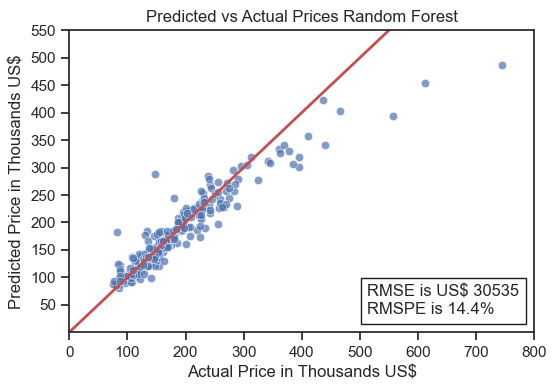

In [364]:
from sklearn import metrics
import math

predicted_values = randomForest_best.predict(X_le_test)

predicted_values = np.exp(predicted_values)

y_le_test_exp = np.exp(y_le_test)

mse = metrics.mean_squared_error(y_le_test_exp, predicted_values)

rmse = math.sqrt(mse)

print('The RMSE is %.0f'% rmse)

rmspe = (np.sqrt(np.mean(np.square((y_le_test_exp - predicted_values) / y_le_test_exp)))) * 100

print('The RMSPE is %.2f %%'% rmspe)

f, ax = plt.subplots()
sns.scatterplot(x=y_le_test_exp, y=predicted_values, palette='Reds', alpha=0.7)
ax.set(ylabel="Predicted Price in Thousands US$",
       xlabel="Actual Price in Thousands US$",
      title="Predicted vs Actual Prices Random Forest")
plt.yticks(ax.get_yticks(), (ax.get_yticks() / 1000).astype(int))
plt.xticks(ax.get_xticks(), (ax.get_xticks() / 1000).astype(int))
plt.ylim(0)
plt.xlim(0)
at = AnchoredText('RMSE is US$ %.0f\nRMSPE is %.1f%%'% (rmse, rmspe),
                  prop=dict(size=12), frameon=True,
                  loc='lower right')
ax.add_artist(at)
# Draw a line of x=y 
plt.plot([800000, 0], [800000, 0], linewidth=2, color="r")
f.savefig('./images/PredictesVsActuals_RF.png', dpi=500)

- Doesn't seem to be anything too interesting about the RF results vs the Ridge1 model.
- The results seem to be better for houses under 300k and get pretty big errors for houses over 375k